In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np

# Chcunk를 분할하여 담을 리스트 생성
chunk_box = list()

# train_file_path =  '/content/gdrive/My Drive/Colab Notebooks/santander-product-recommendation/train_ver2.csv'
train_file_path = '/kaggle/santander-product-recommendation/train_ver2.csv'

#chcunk를 읽어와서 chunk_box에 추가
for chunk in pd.read_csv(train_file_path, low_memory=False, chunksize=20000):
    chunk_box.append(chunk)

# chcunk_box에 존재하는 데이터 프레임 결합
trn = pd.concat(chunk_box, axis = 0)

# trn = pd.read_csv(train_file_path)

### 불필요한 리스트 변수 삭제

In [5]:
del chunk_box

### 데이터 프레임의 행과 열의 개수 확인


In [5]:
print (trn.shape)

(13647309, 48)


### 모든 feature의 5줄 확인


In [6]:
for col in trn.columns:
  print ("{}\n".format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

### feature의 Type 확인

In [7]:
print (trn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

### feature의 평균, 표준, 최소, 최대 등 확인

In [8]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
print (trn[num_cols].describe())

           ncodpers     ind_nuevo  ...  ind_actividad_cliente         renta
count  1.364731e+07  1.361958e+07  ...           1.361958e+07  1.085293e+07
mean   8.349042e+05  5.956184e-02  ...           4.578105e-01  1.342543e+05
std    4.315650e+05  2.366733e-01  ...           4.982169e-01  2.306202e+05
min    1.588900e+04  0.000000e+00  ...           0.000000e+00  1.202730e+03
25%    4.528130e+05  0.000000e+00  ...           0.000000e+00  6.871098e+04
50%    9.318930e+05  0.000000e+00  ...           0.000000e+00  1.018500e+05
75%    1.199286e+06  0.000000e+00  ...           1.000000e+00  1.559560e+05
max    1.553689e+06  1.000000e+00  ...           1.000000e+00  2.889440e+07

[8 rows x 7 columns]


In [9]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
print (trn[cat_cols].describe())

        fecha_dato ind_empleado  ...   nomprov           segmento
count     13647309     13619575  ...  13553718           13457941
unique          17            5  ...        52                  3
top     2016-05-28            N  ...    MADRID  02 - PARTICULARES
freq        931453     13610977  ...   4409600            7960220

[4 rows x 17 columns]


### 전처리를 위한 수치형 변수 변환을 위해 범주형 변수의 고유 값을 확인

In [10]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print ('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col age, n_uniq 219, uniq ['  2' '  3' '  4' '  5' '  6' '  7' '  8' '  9' ' 10' ' 11' ' 12' ' 13'
 ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24' ' 25'
 ' 26' ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36' ' 37'
 ' 38' ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48' ' 49'
 ' 50' ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60' ' 61'
 ' 62' ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72' ' 73'
 ' 74' ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84' ' 85'
 ' 86' ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96' ' 97'
 ' 98' ' 99' ' NA' '10' '100' '101' '102' '103' '104' '105' '106' '107'
 '108' '109' '11' '110' '111' '112' '113' '114' '115' '116' '117' '12'
 '126' '127' '13' '14' '15' '16' '163' '164' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' 

### 시각화로 데이터 살피기

In [11]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--------------------------------------------------
col :  fecha_dato


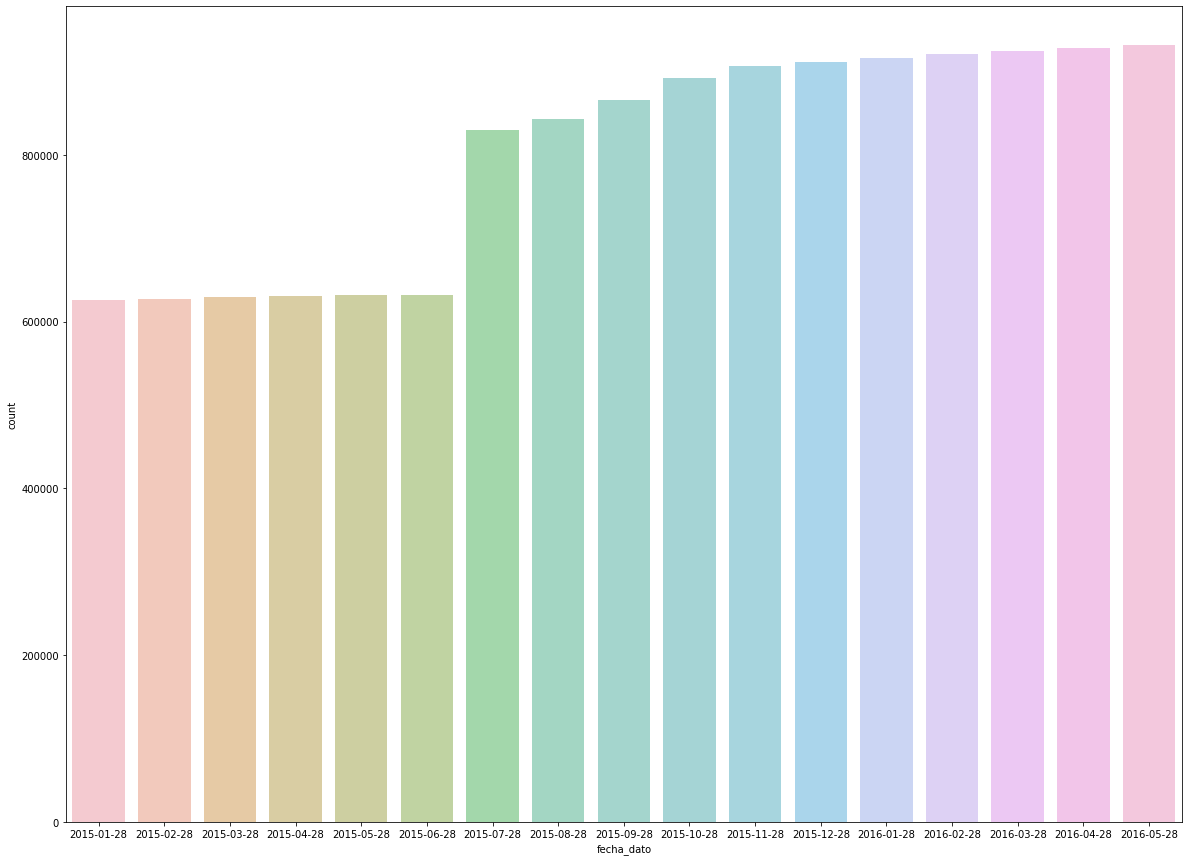

--------------------------------------------------
col :  ind_empleado


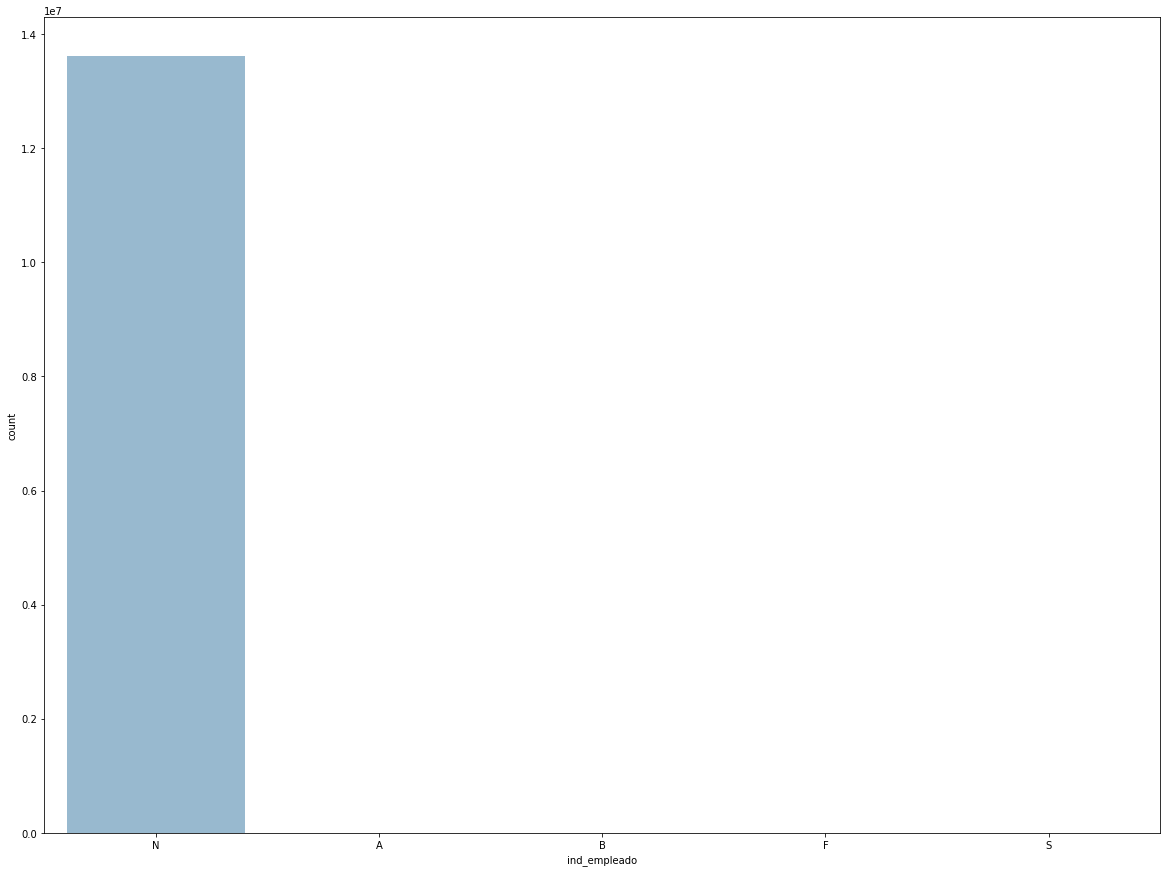

--------------------------------------------------
col :  pais_residencia


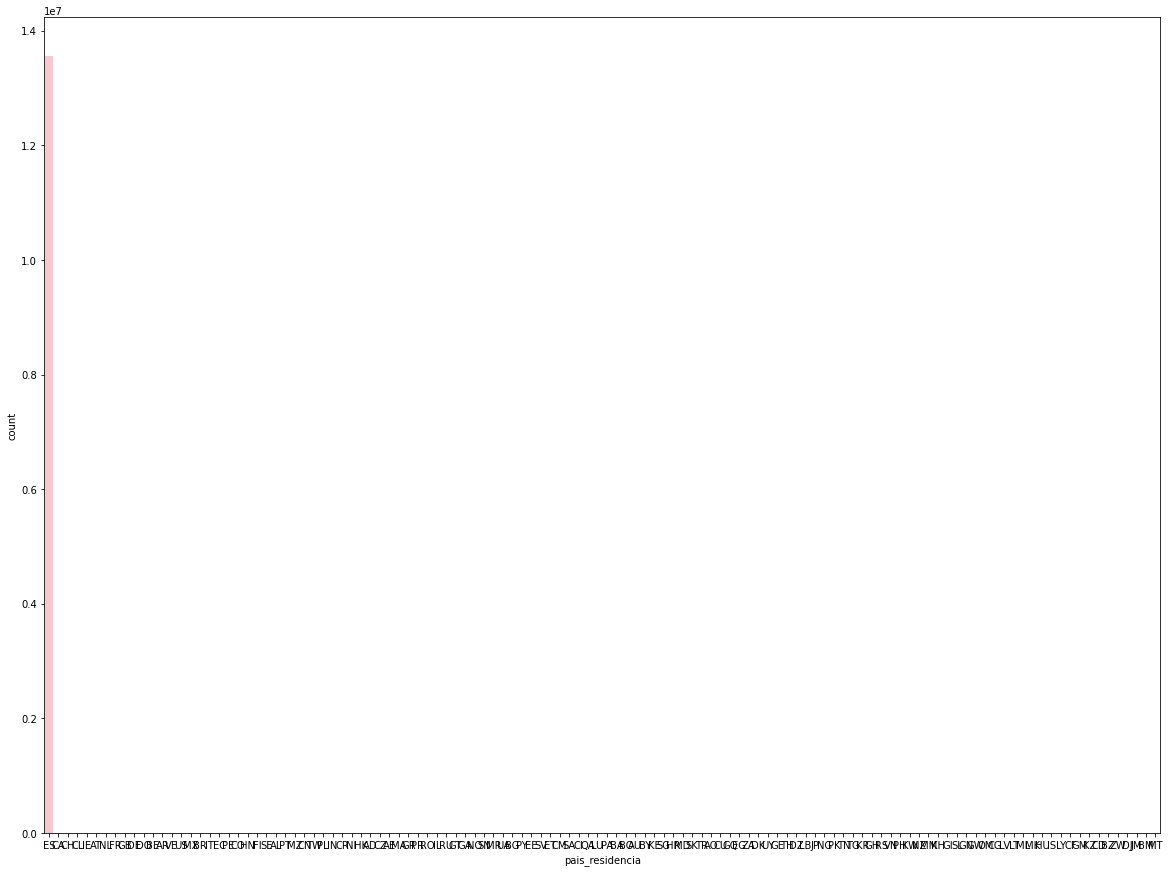

--------------------------------------------------
col :  sexo


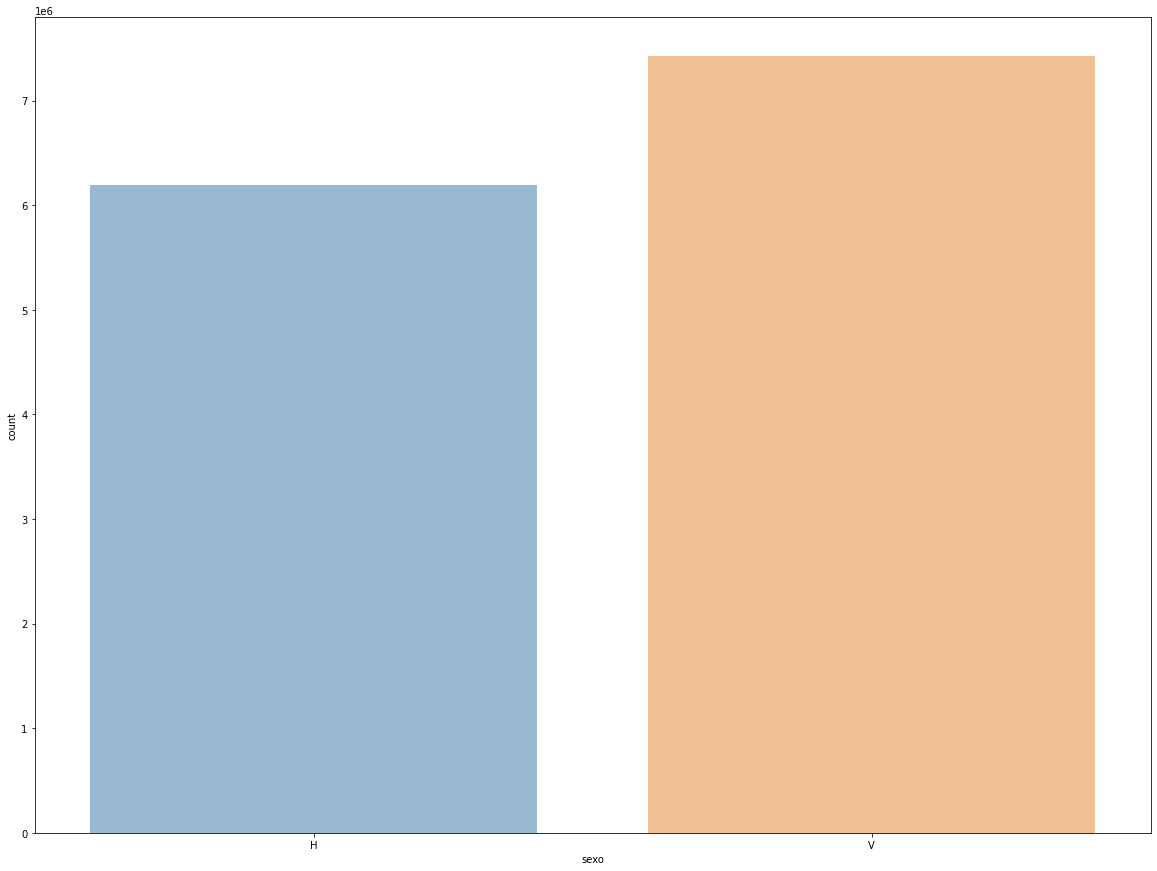

--------------------------------------------------
col :  age


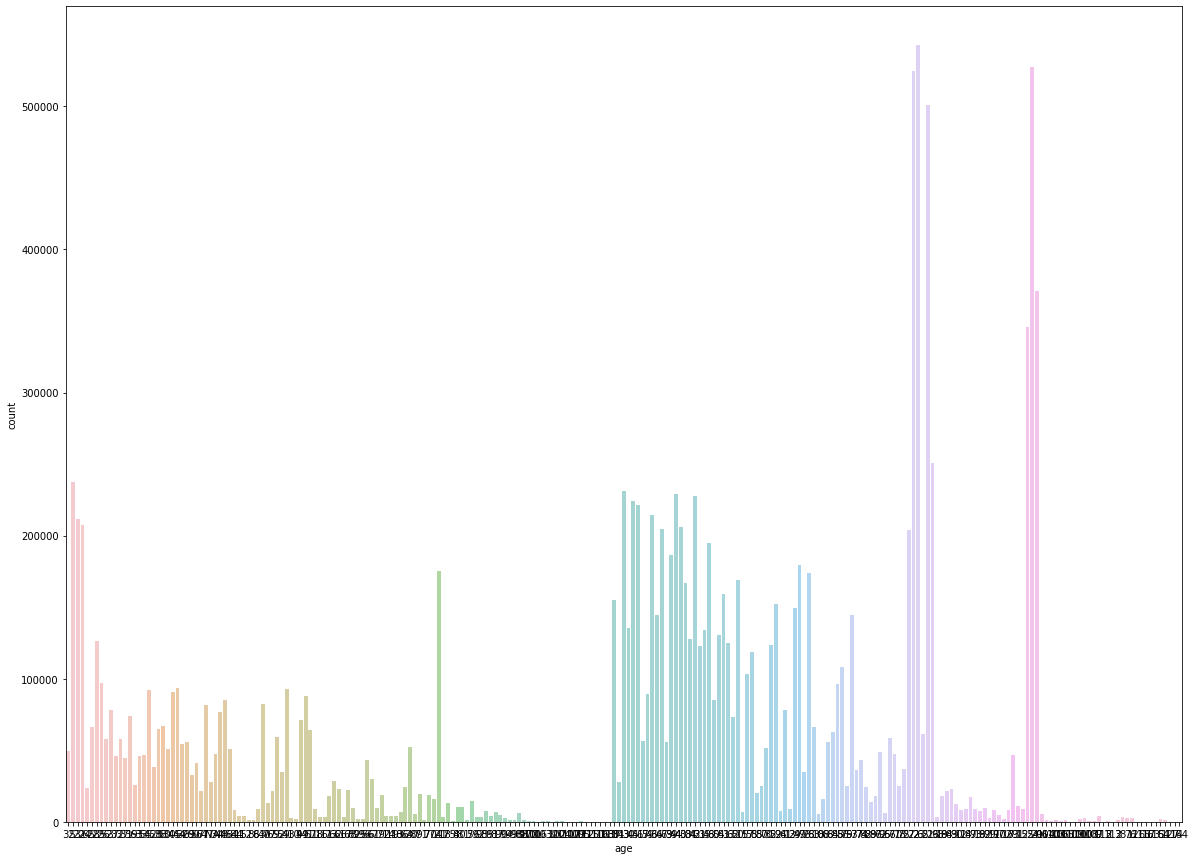

--------------------------------------------------
col :  fecha_alta


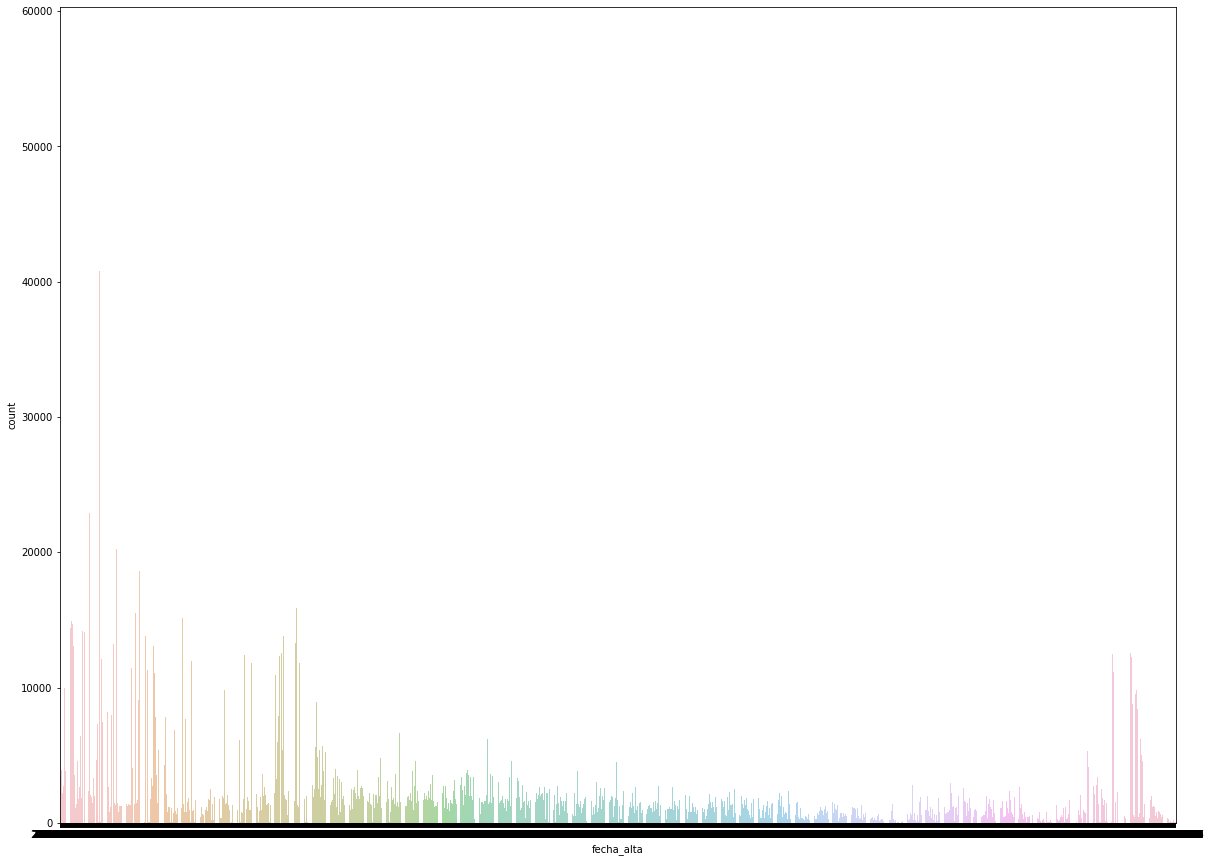

--------------------------------------------------
col :  ind_nuevo


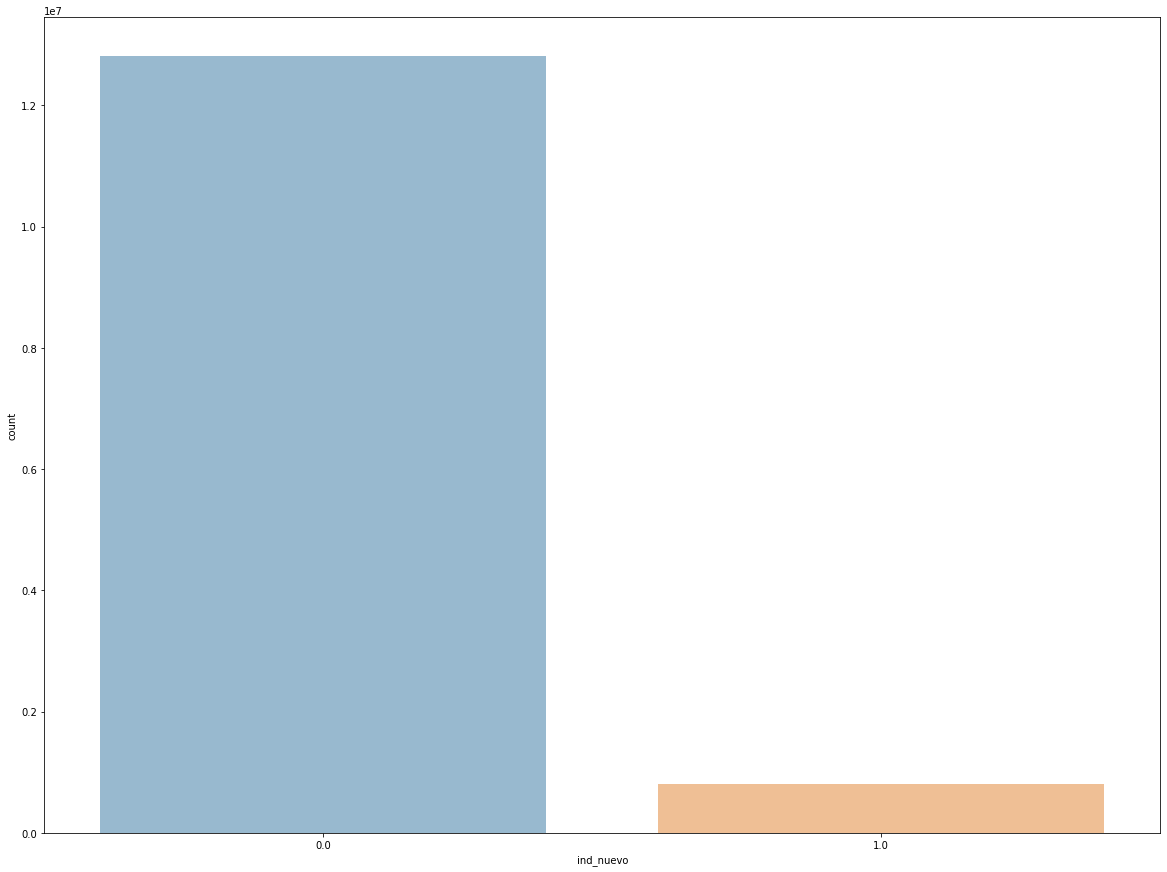

--------------------------------------------------
col :  antiguedad


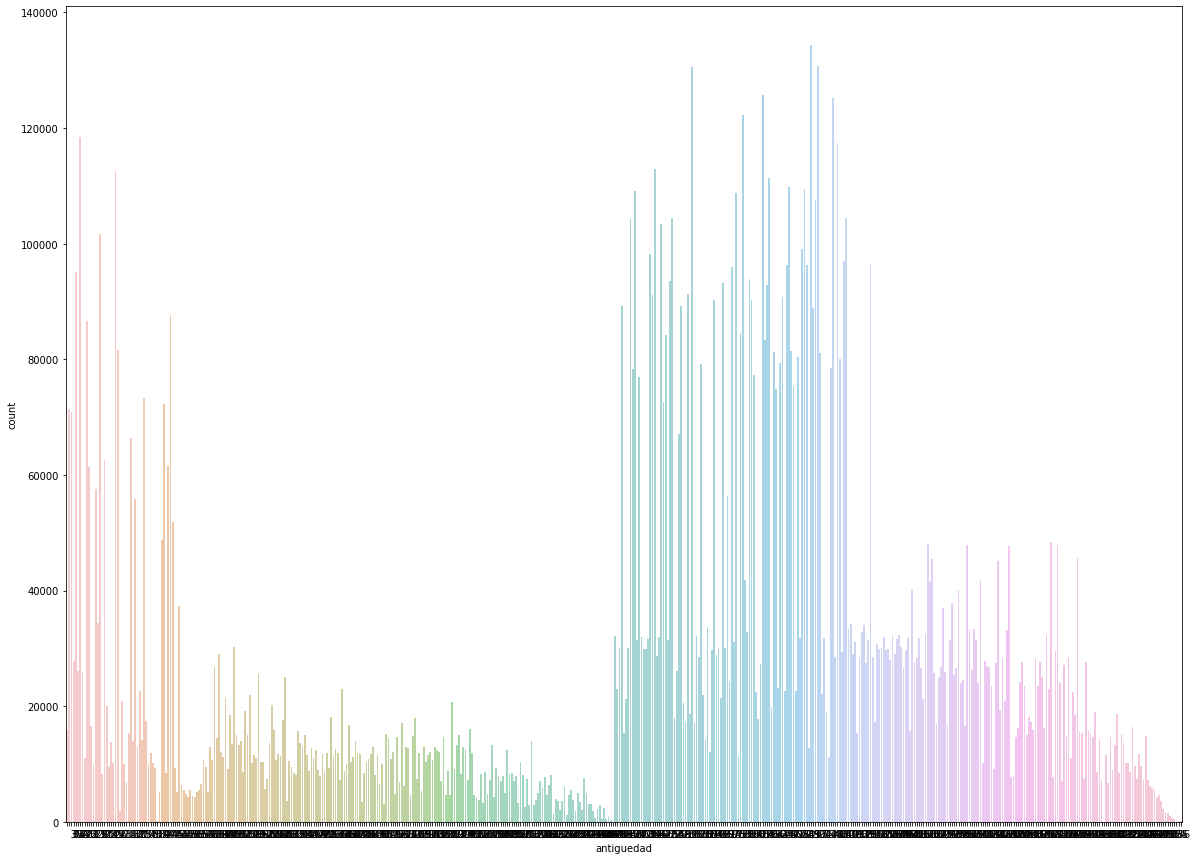

--------------------------------------------------
col :  indrel


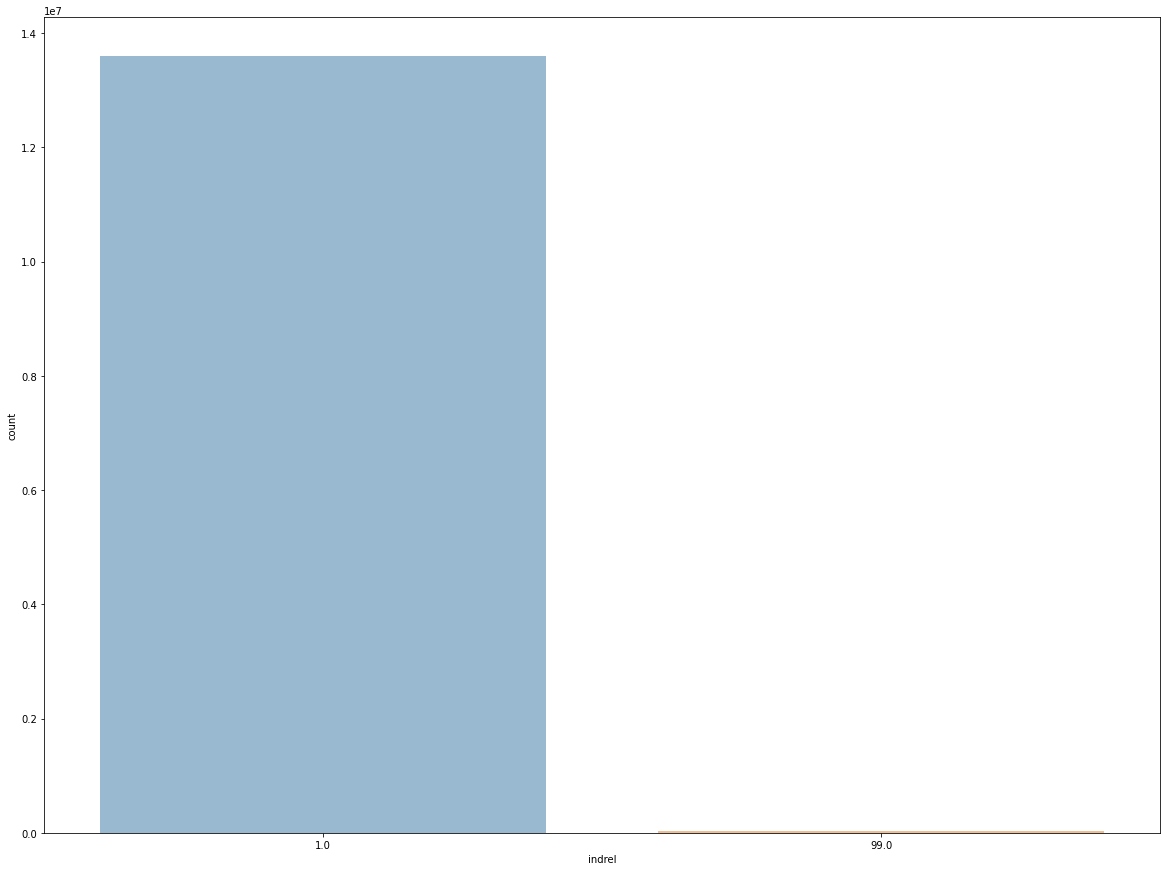

--------------------------------------------------
col :  ult_fec_cli_1t


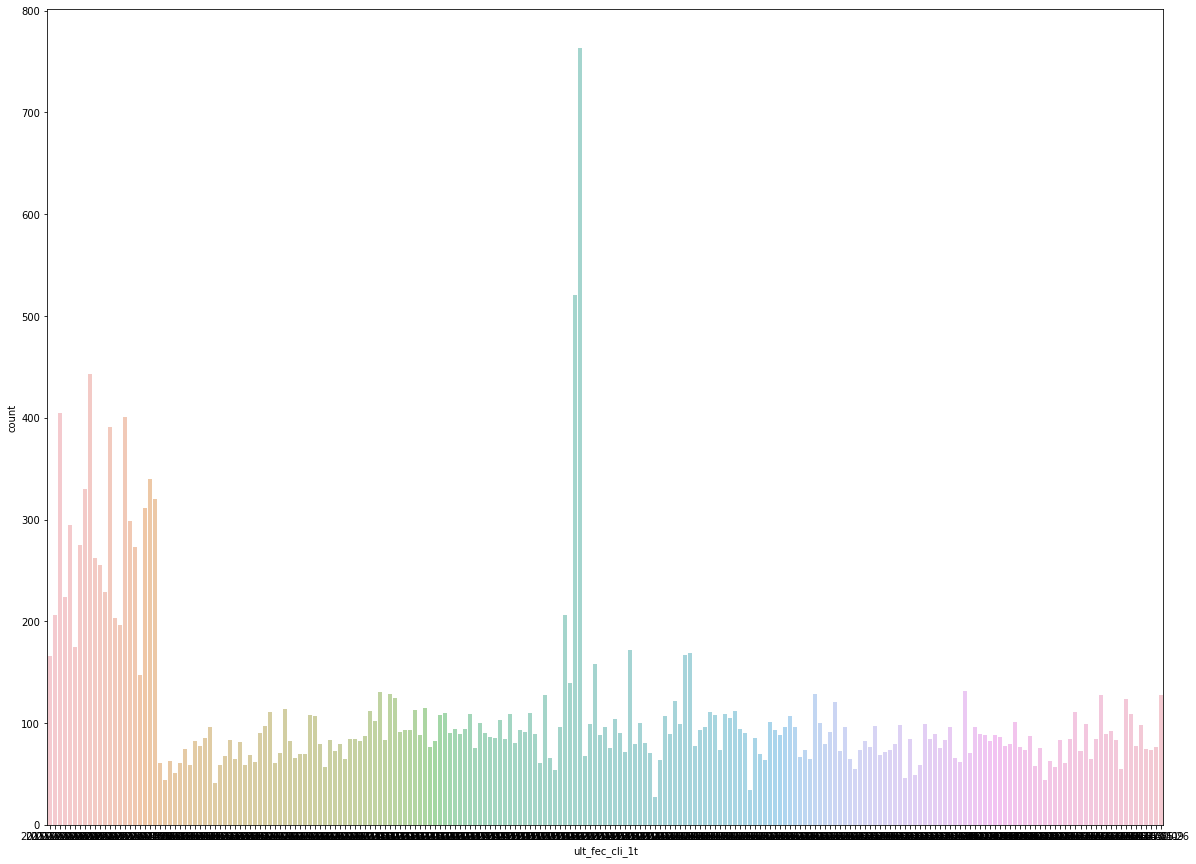

--------------------------------------------------
col :  indrel_1mes


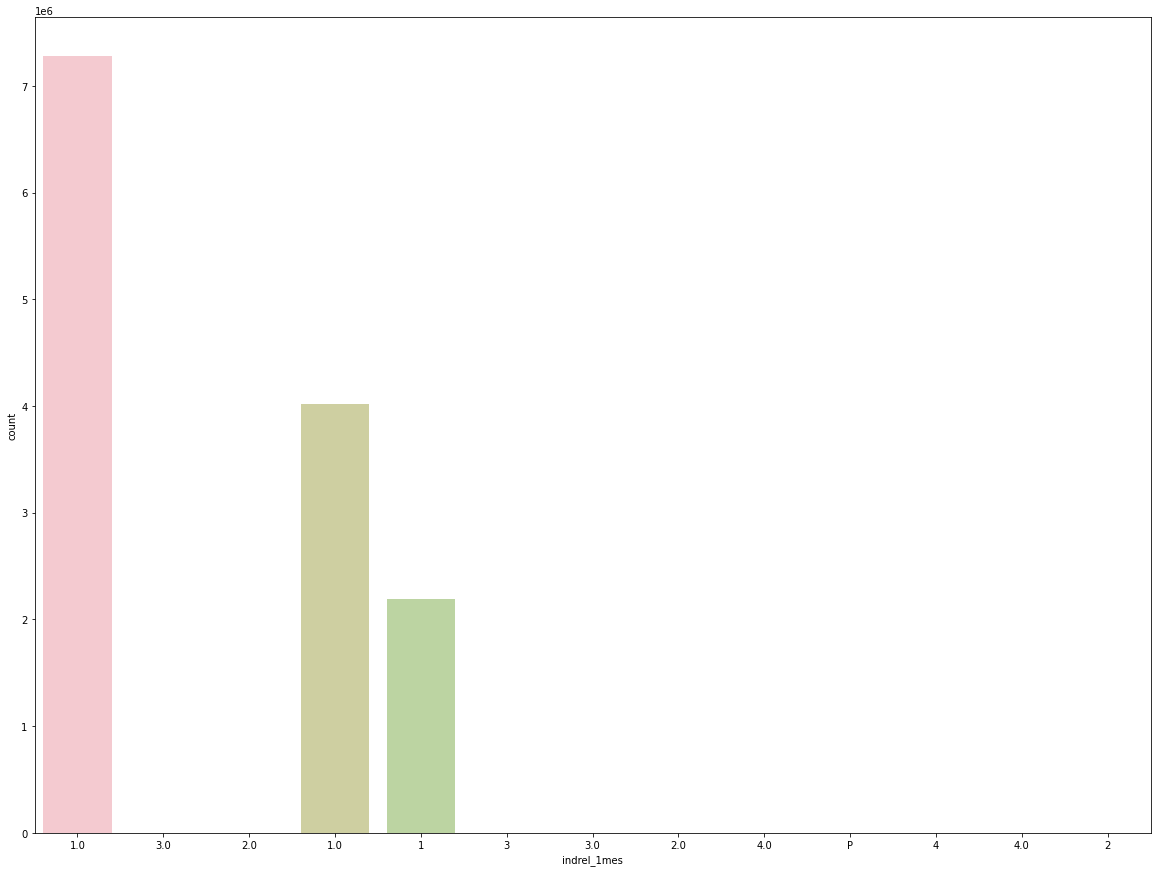

--------------------------------------------------
col :  tiprel_1mes


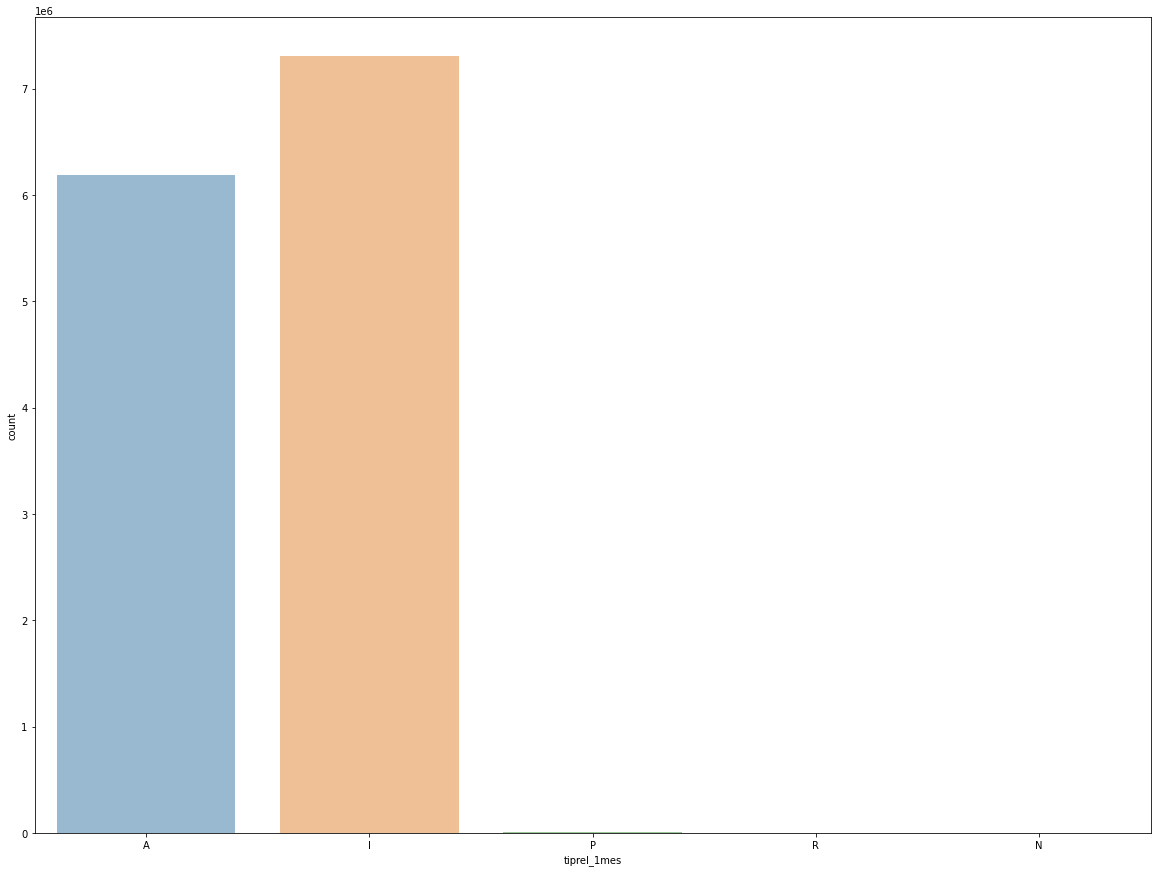

--------------------------------------------------
col :  indresi


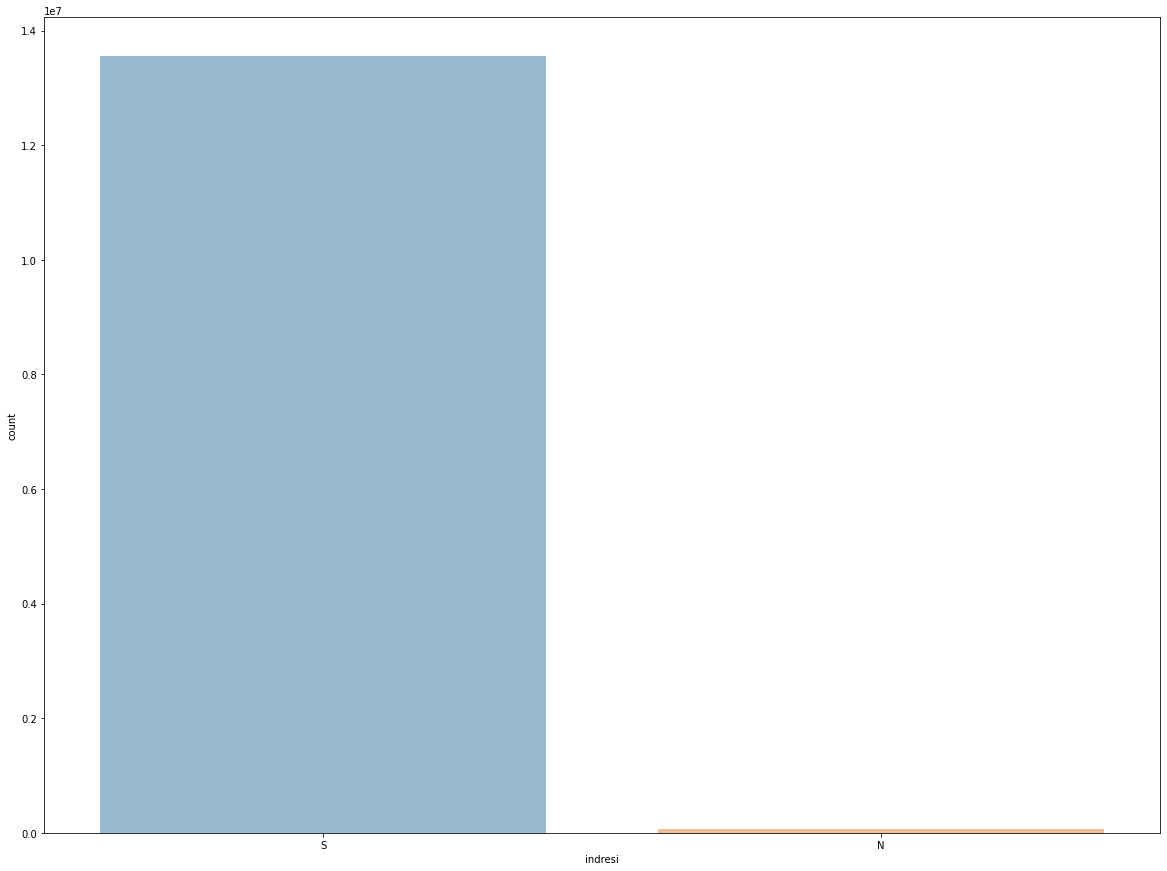

--------------------------------------------------
col :  indext


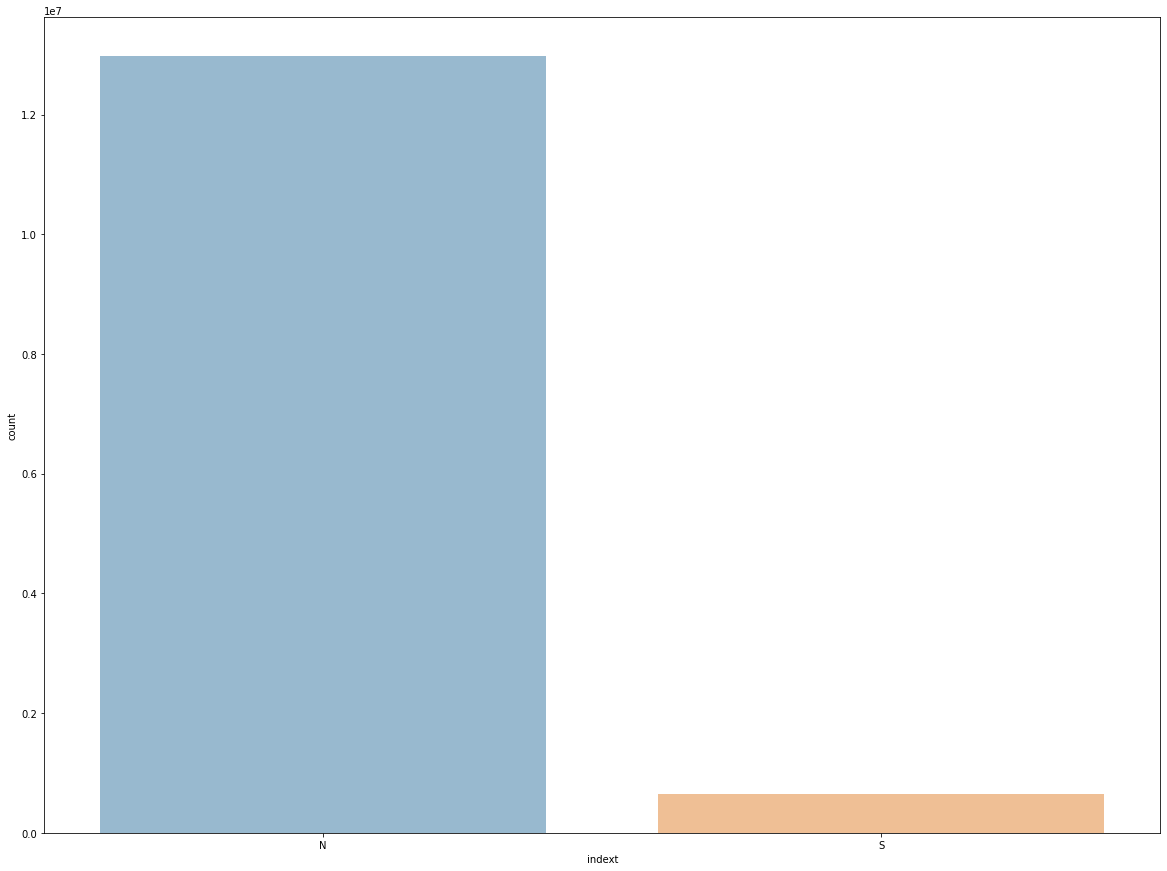

--------------------------------------------------
col :  conyuemp


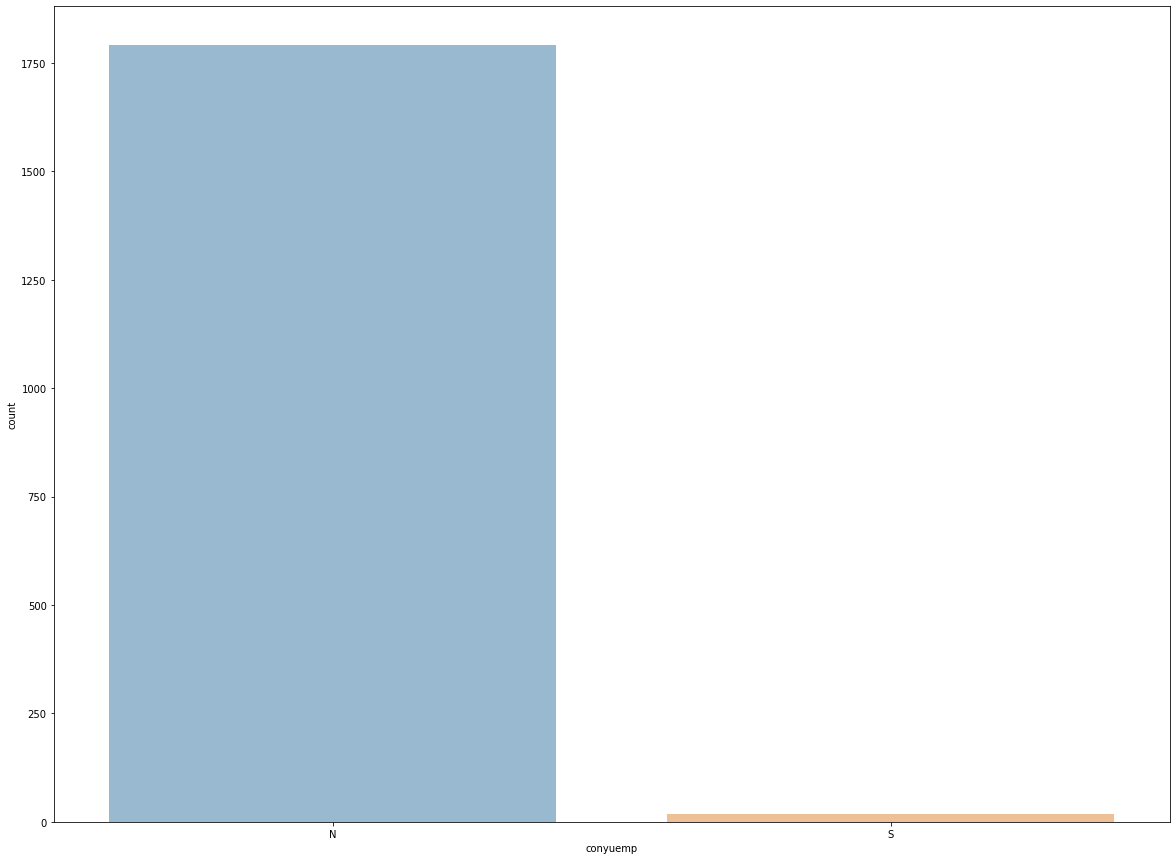

--------------------------------------------------
col :  canal_entrada


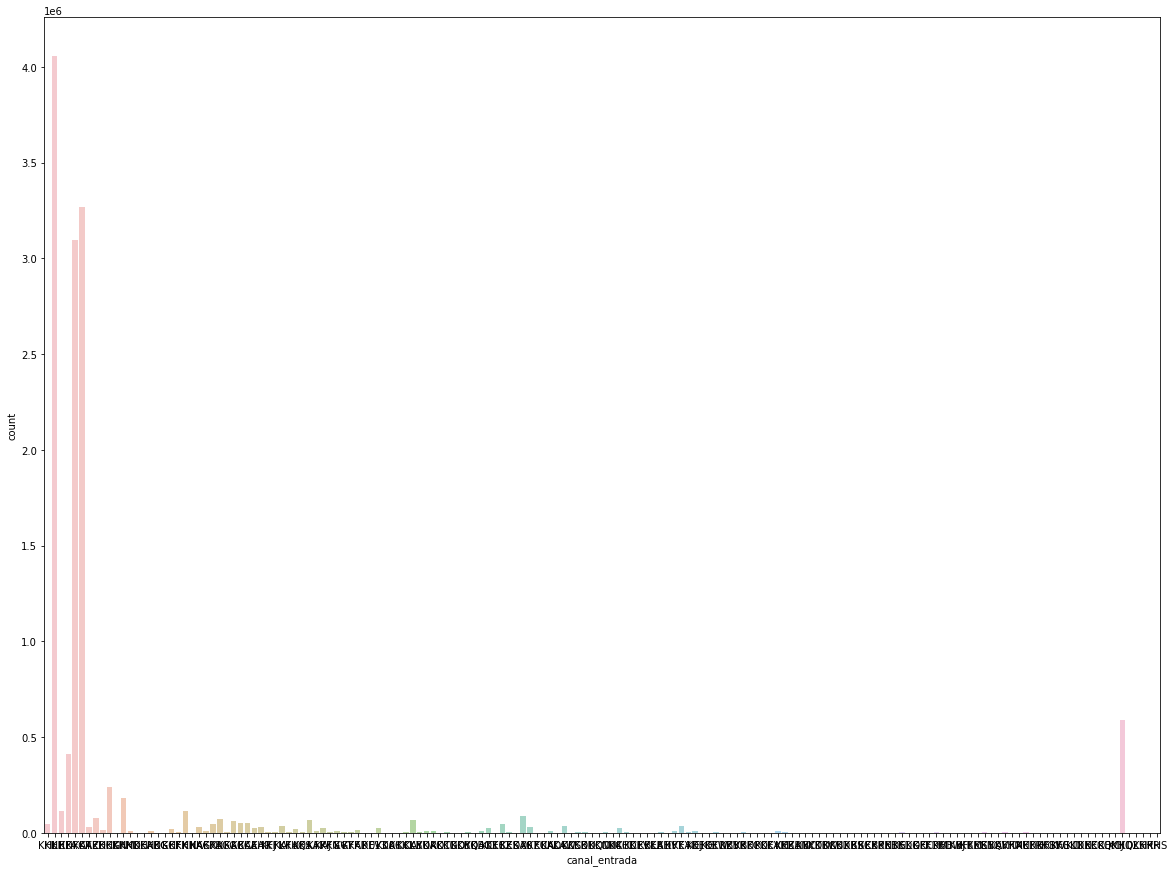

--------------------------------------------------
col :  indfall


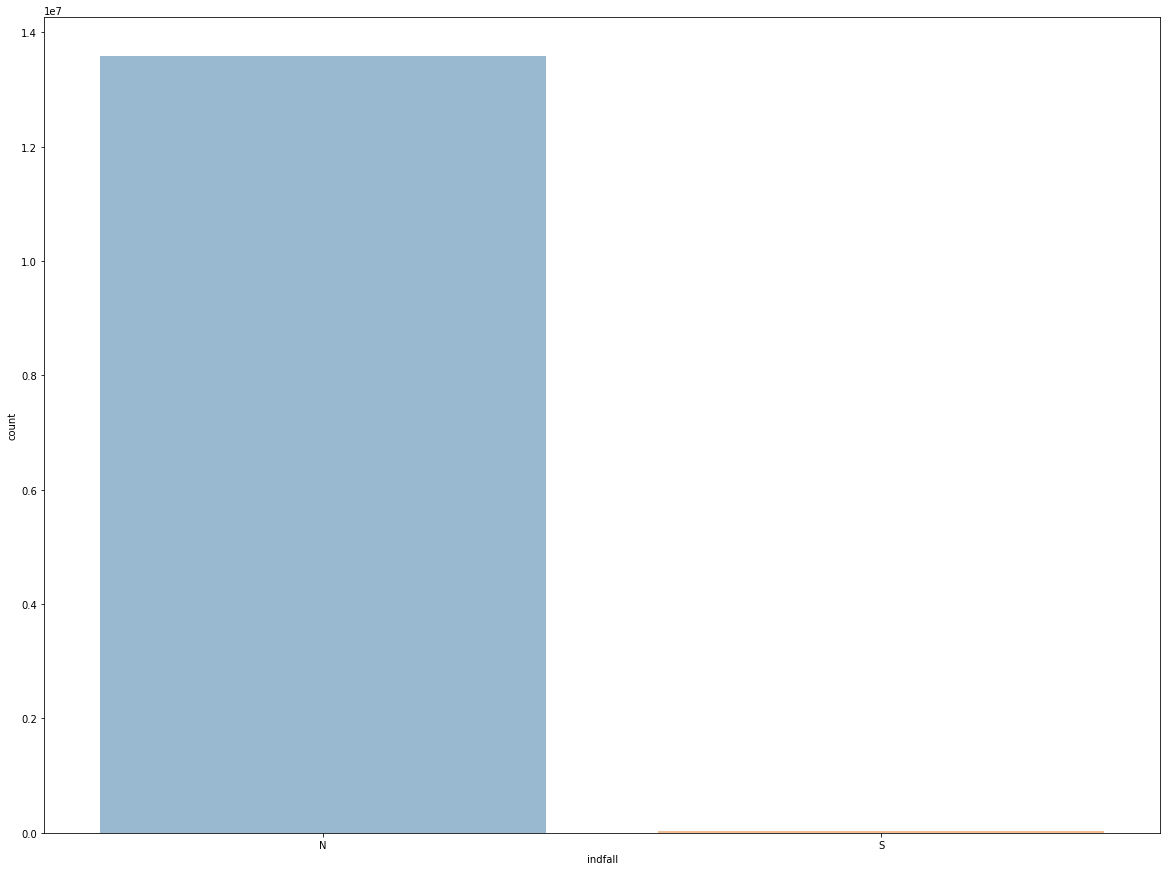

--------------------------------------------------
col :  tipodom


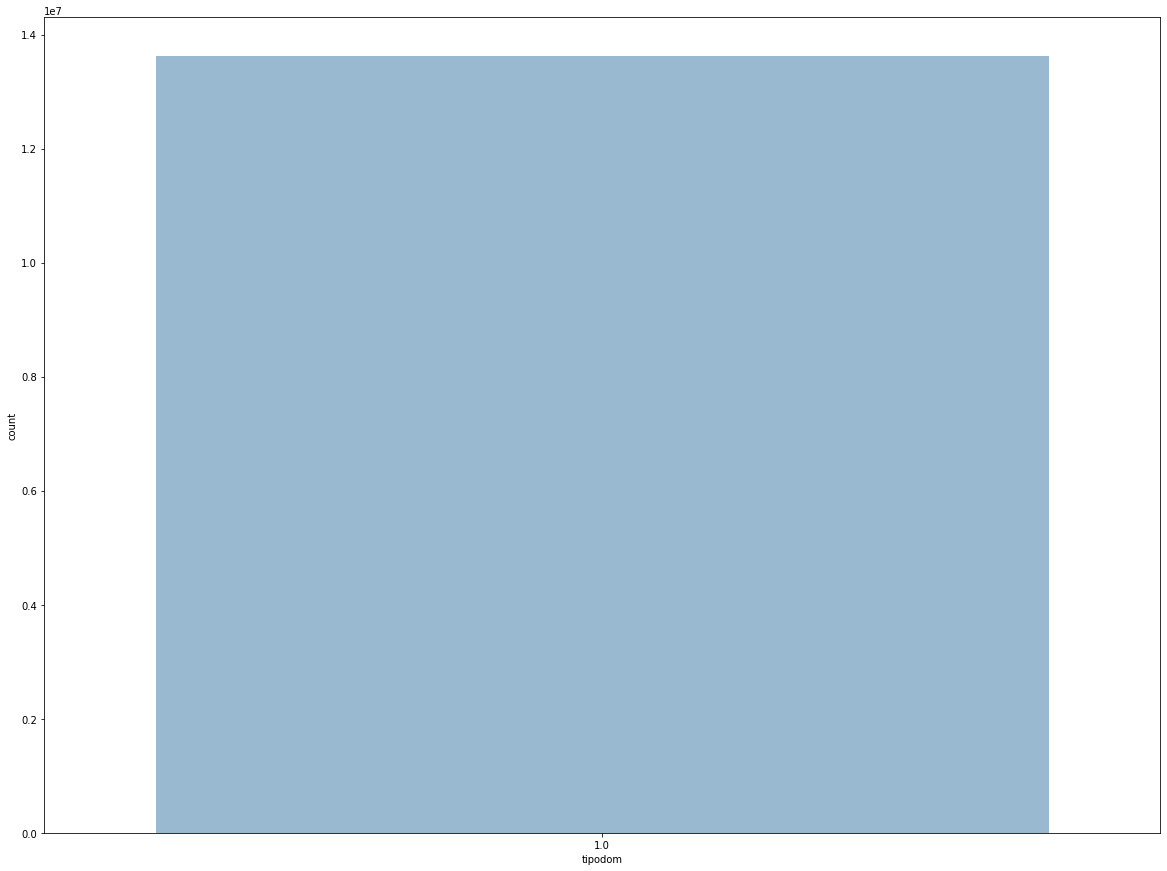

--------------------------------------------------
col :  cod_prov


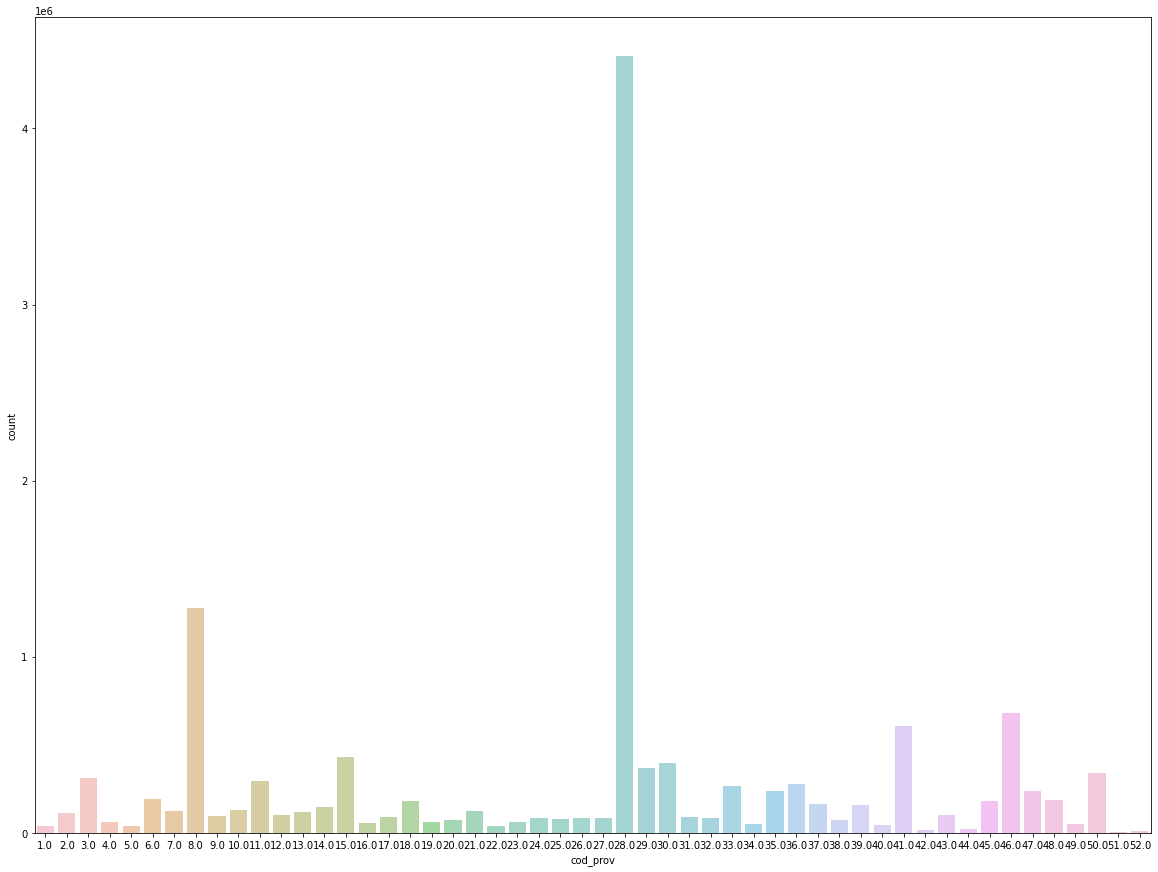

--------------------------------------------------
col :  nomprov


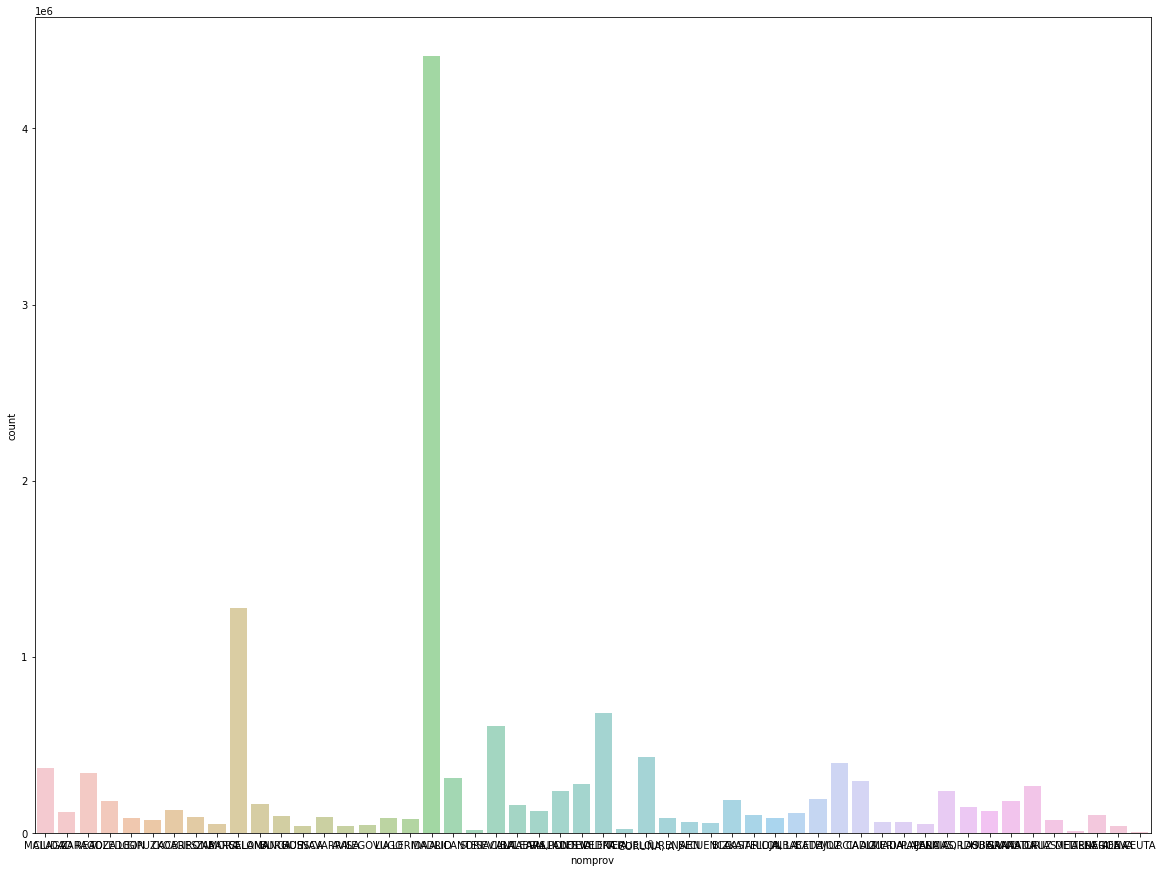

--------------------------------------------------
col :  ind_actividad_cliente


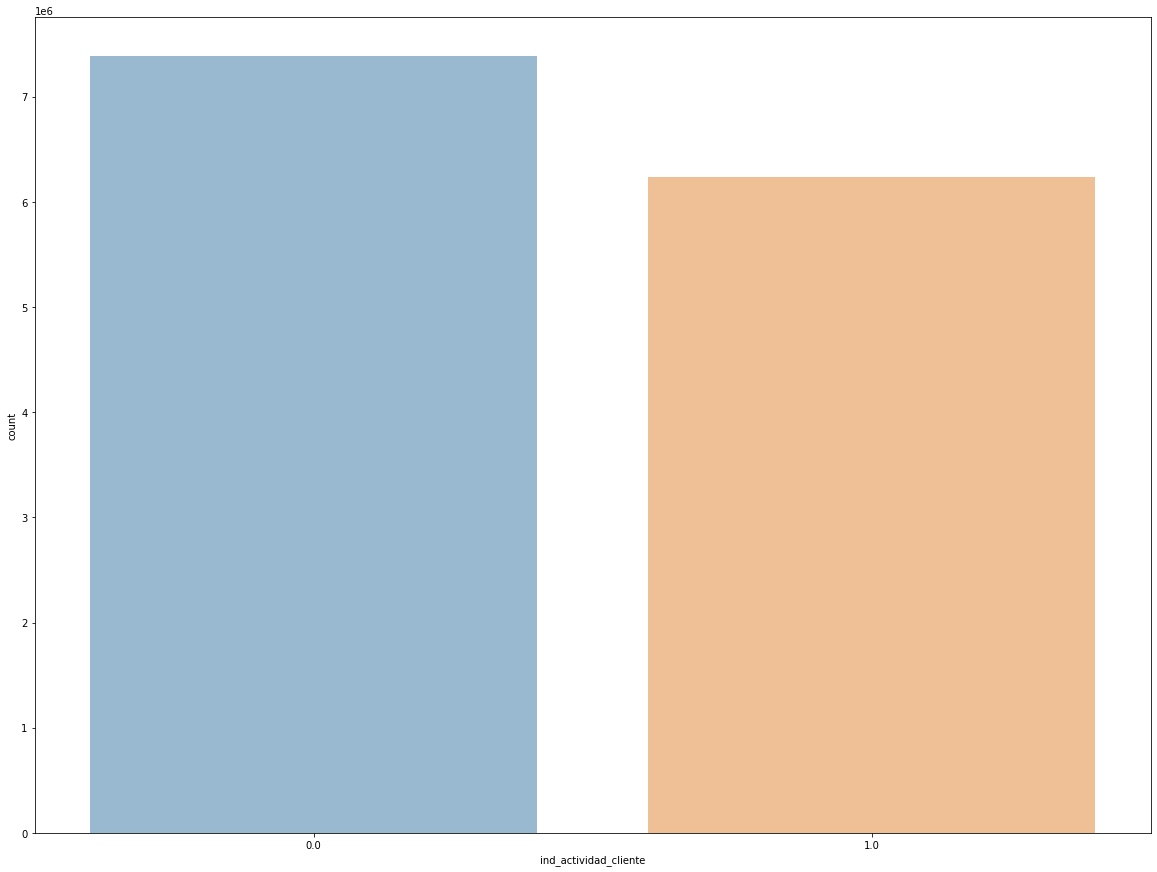

--------------------------------------------------
col :  segmento


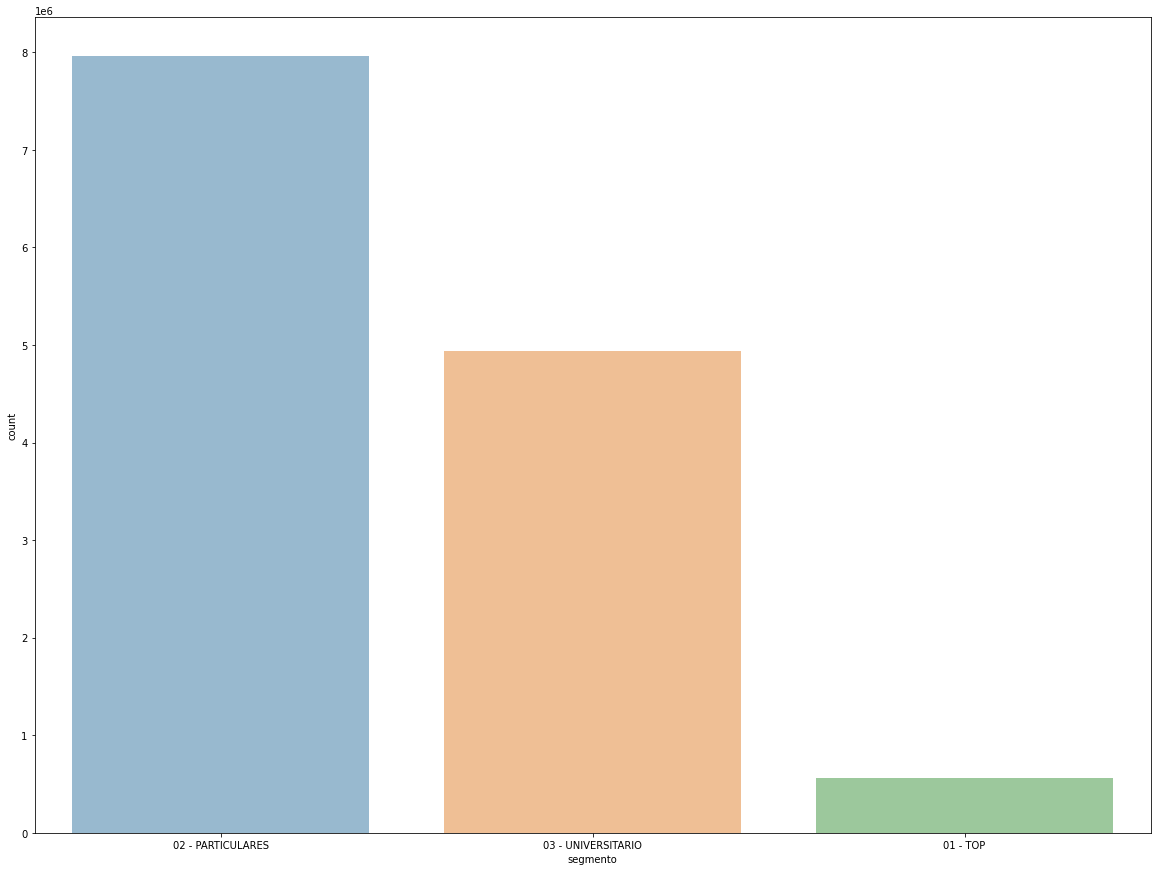

--------------------------------------------------
col :  ind_ahor_fin_ult1


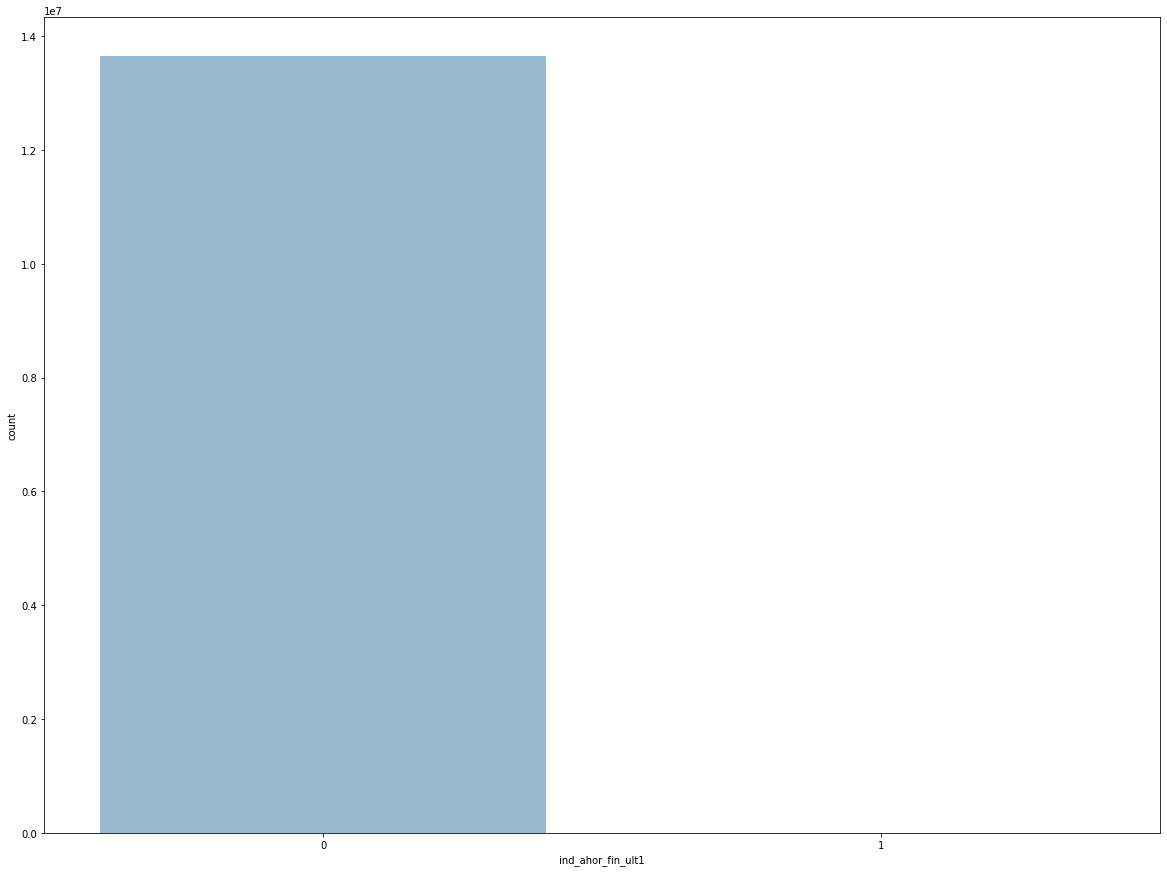

--------------------------------------------------
col :  ind_aval_fin_ult1


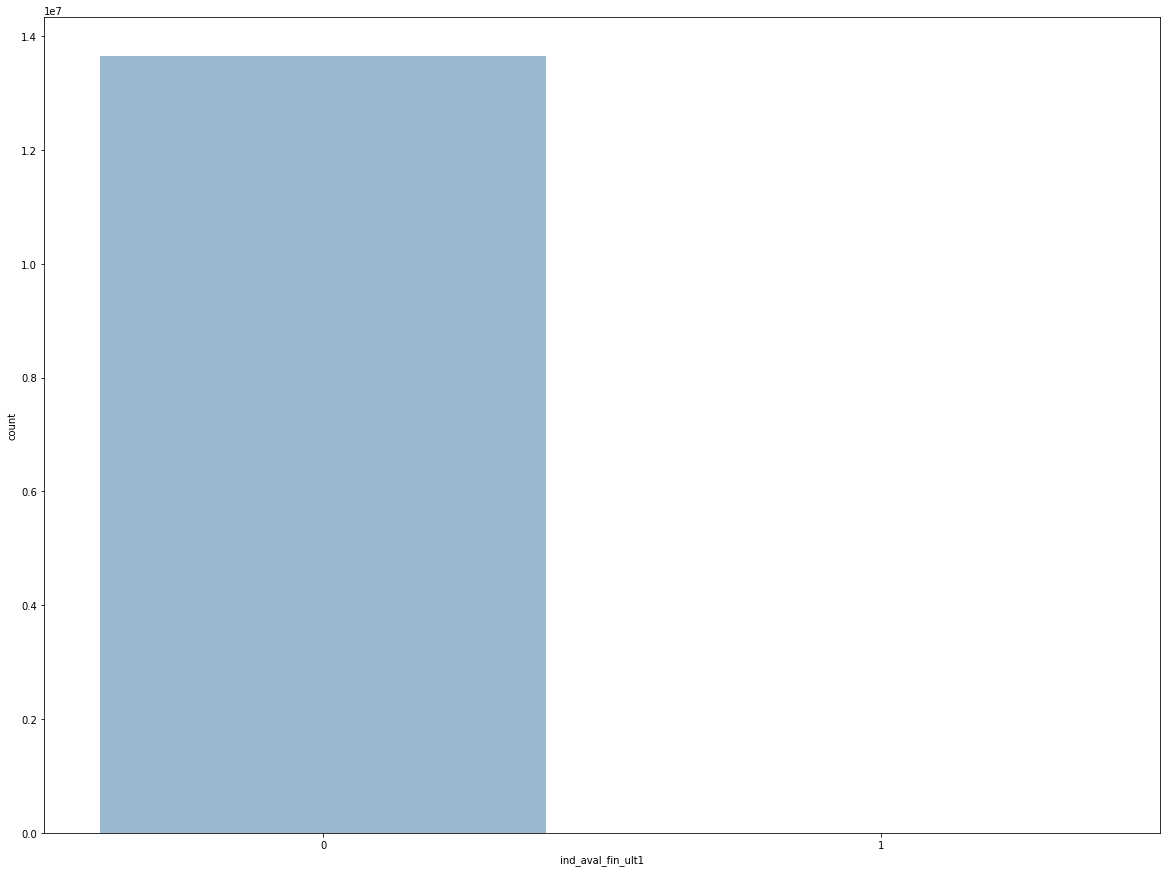

--------------------------------------------------
col :  ind_cco_fin_ult1


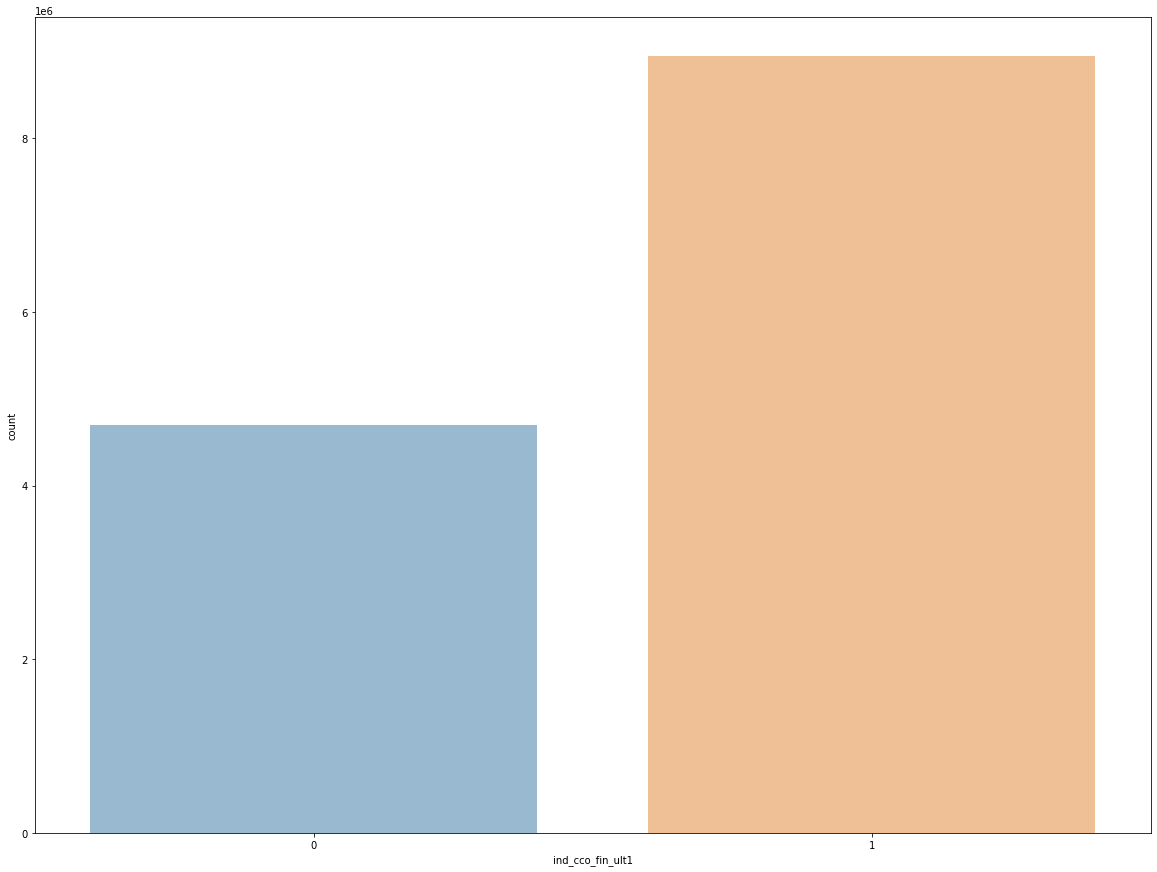

--------------------------------------------------
col :  ind_cder_fin_ult1


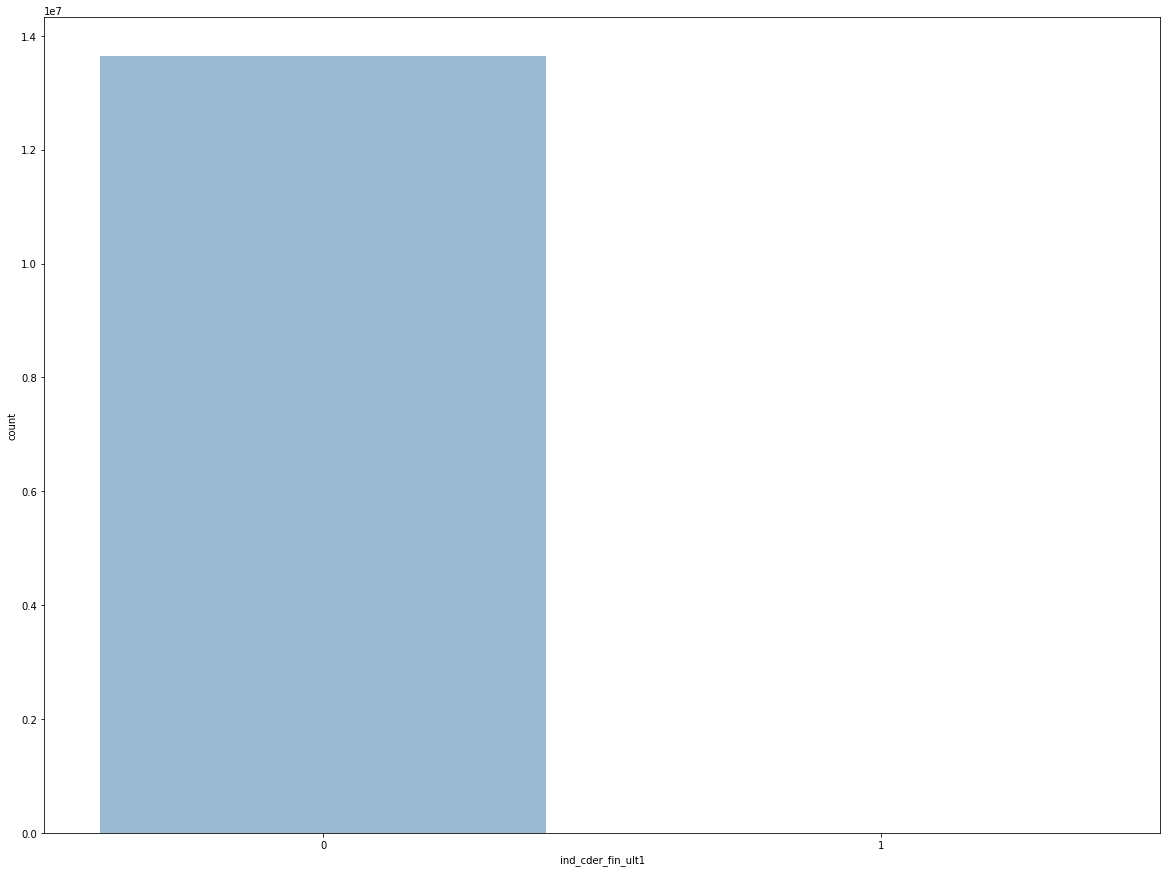

--------------------------------------------------
col :  ind_cno_fin_ult1


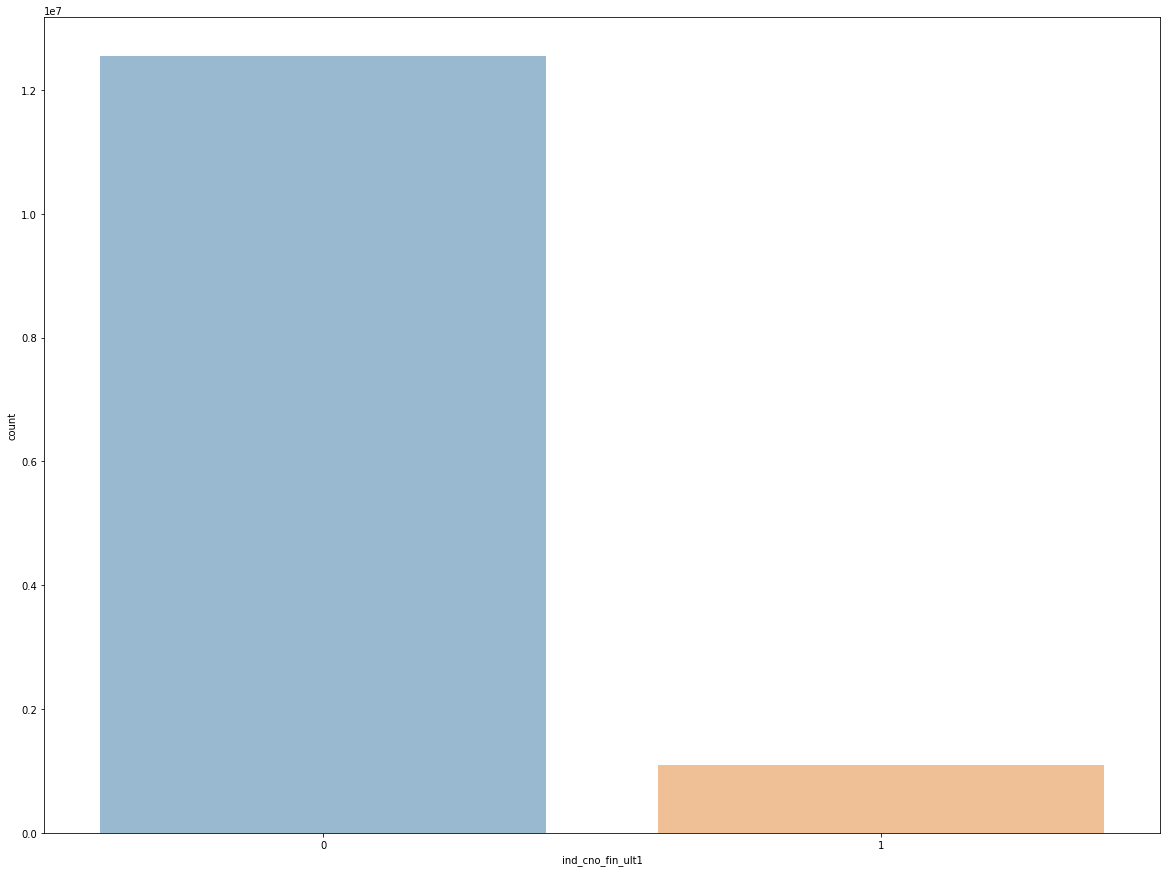

--------------------------------------------------
col :  ind_ctju_fin_ult1


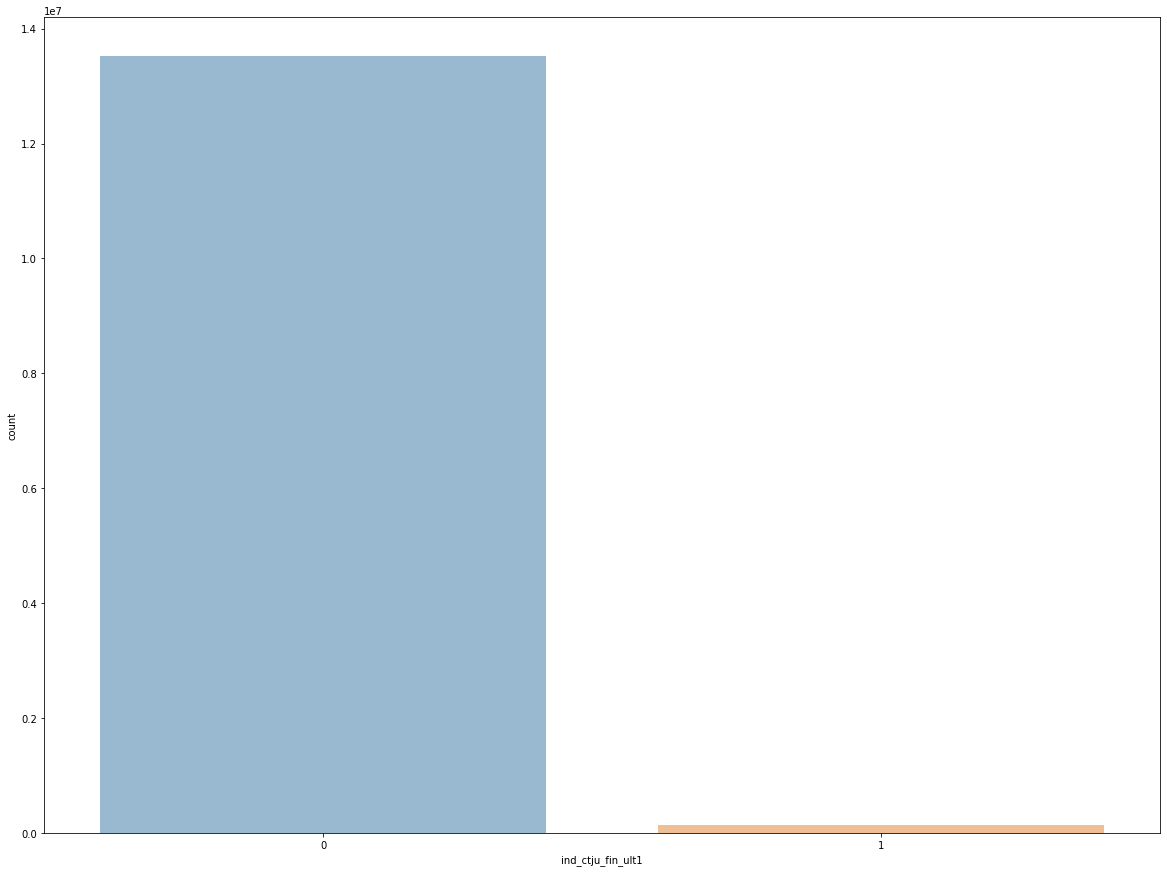

--------------------------------------------------
col :  ind_ctma_fin_ult1


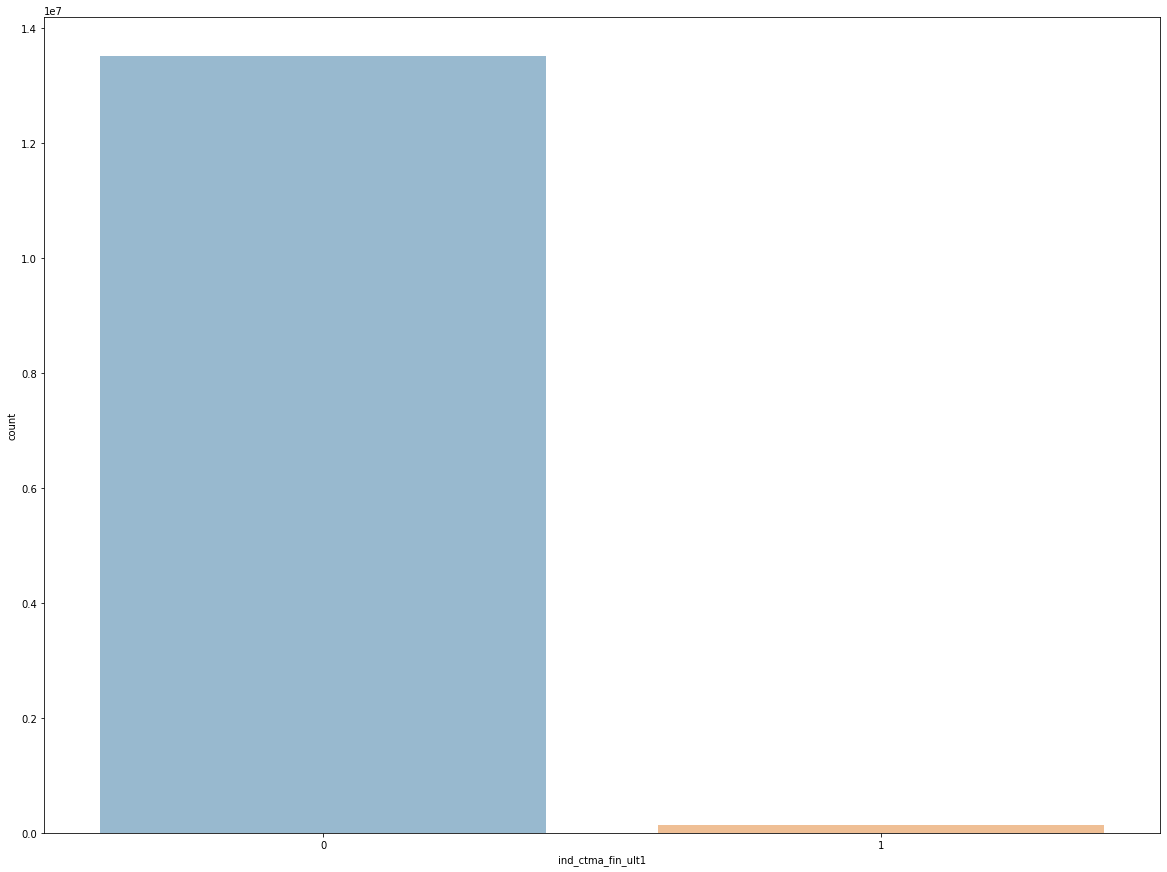

--------------------------------------------------
col :  ind_ctop_fin_ult1


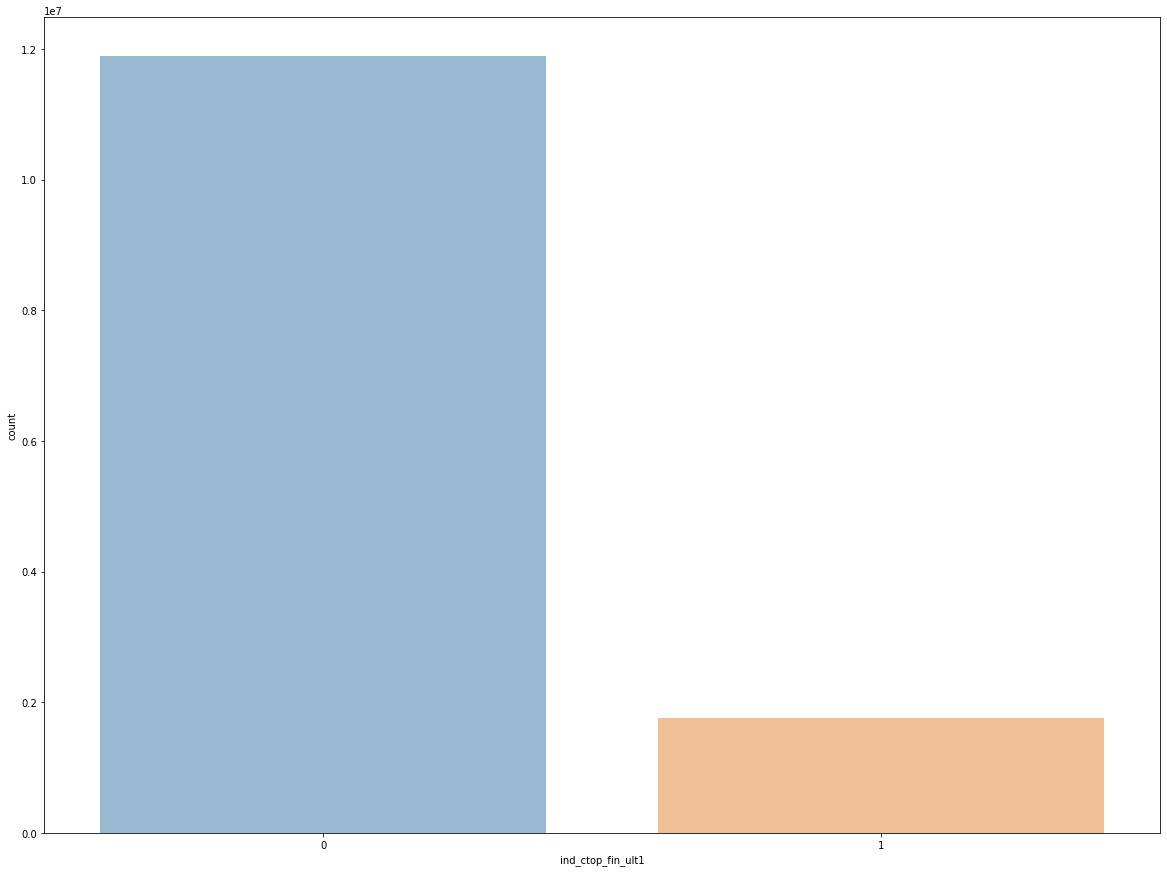

--------------------------------------------------
col :  ind_ctpp_fin_ult1


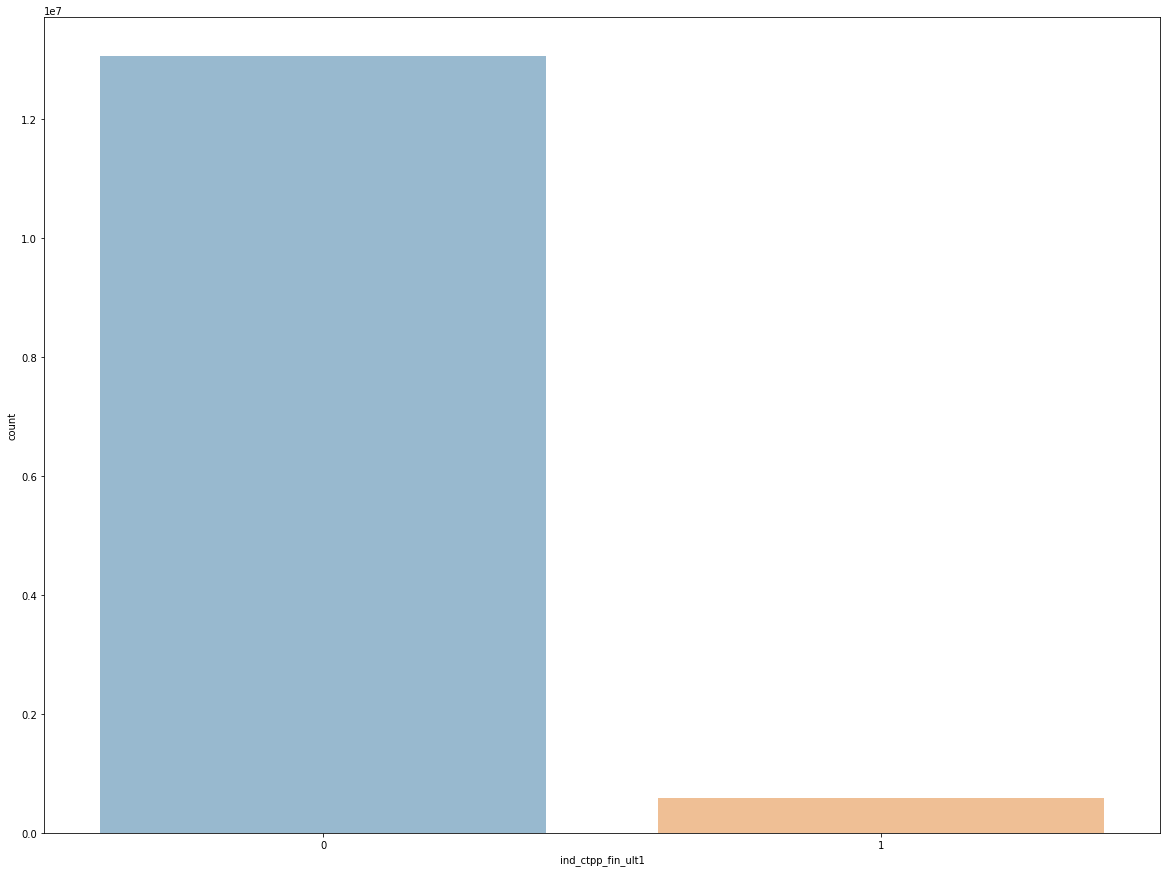

--------------------------------------------------
col :  ind_deco_fin_ult1


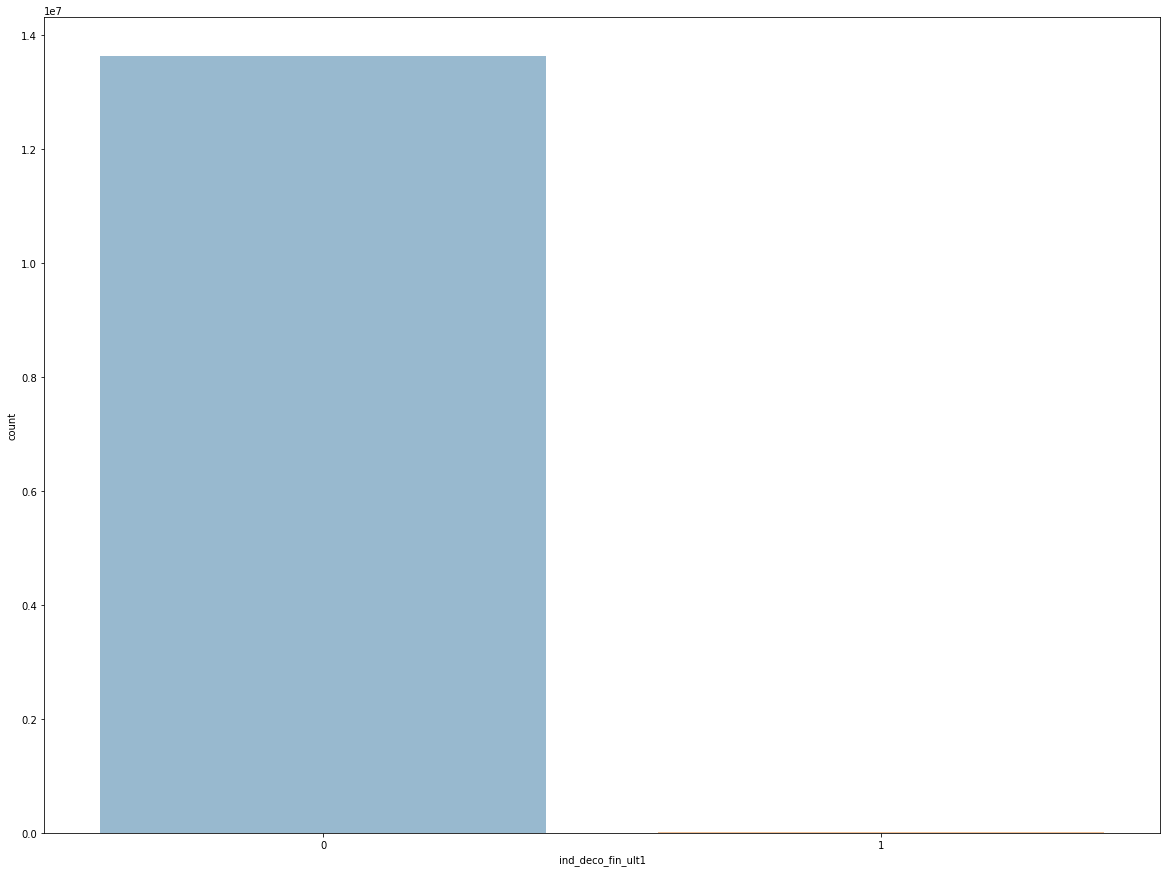

--------------------------------------------------
col :  ind_deme_fin_ult1


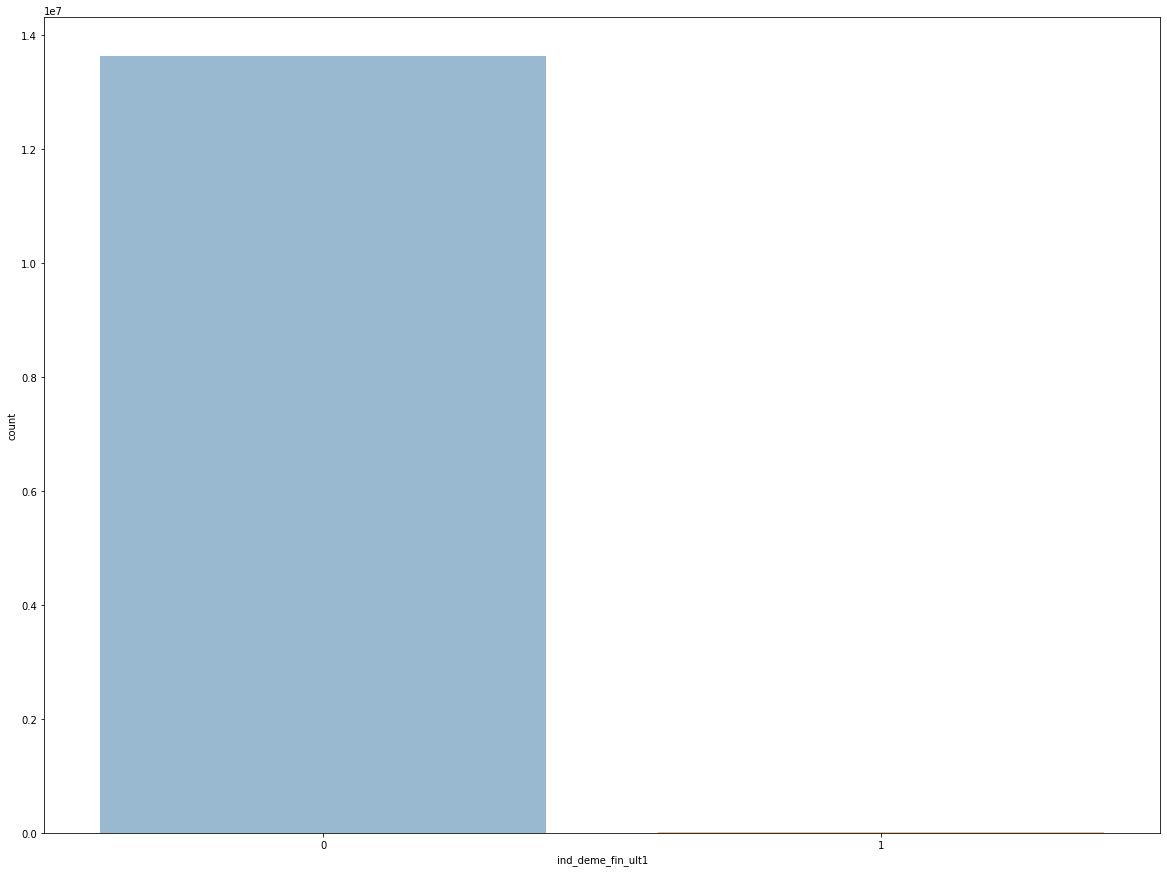

--------------------------------------------------
col :  ind_dela_fin_ult1


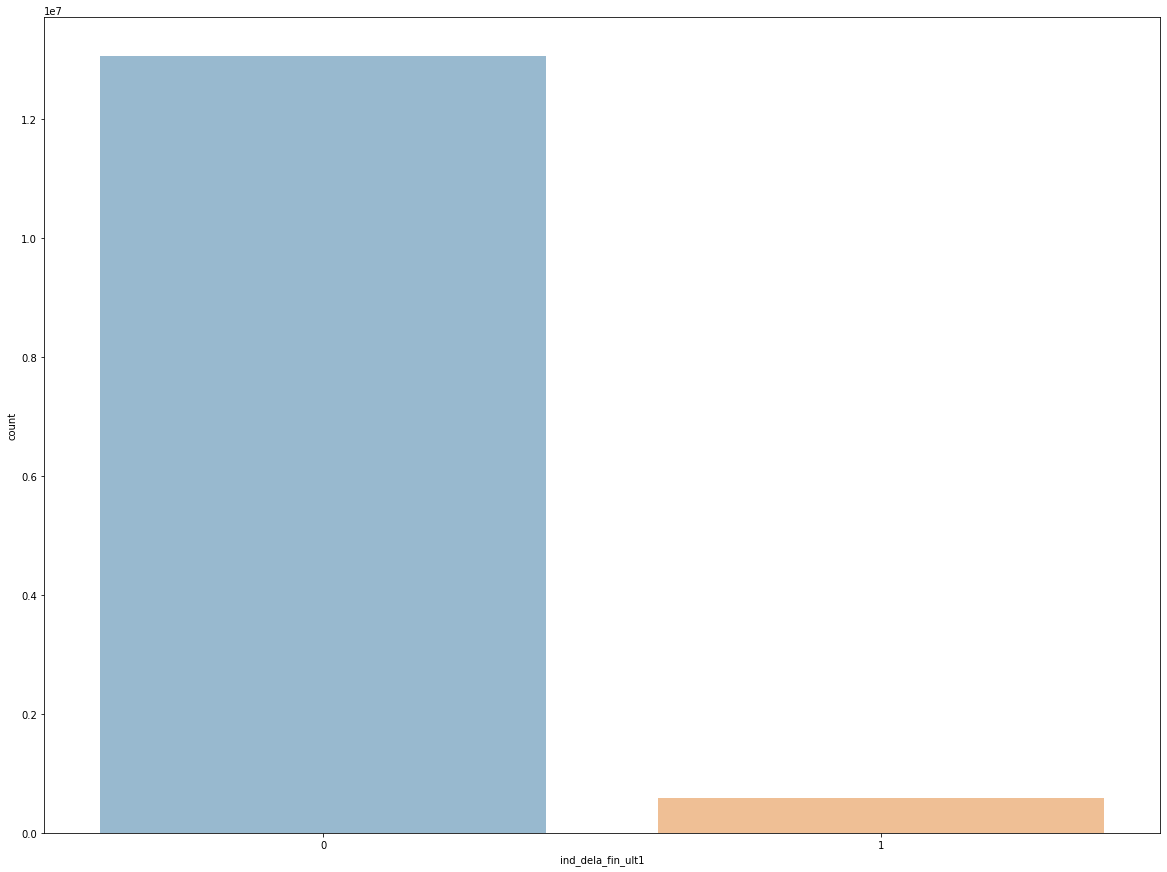

--------------------------------------------------
col :  ind_ecue_fin_ult1


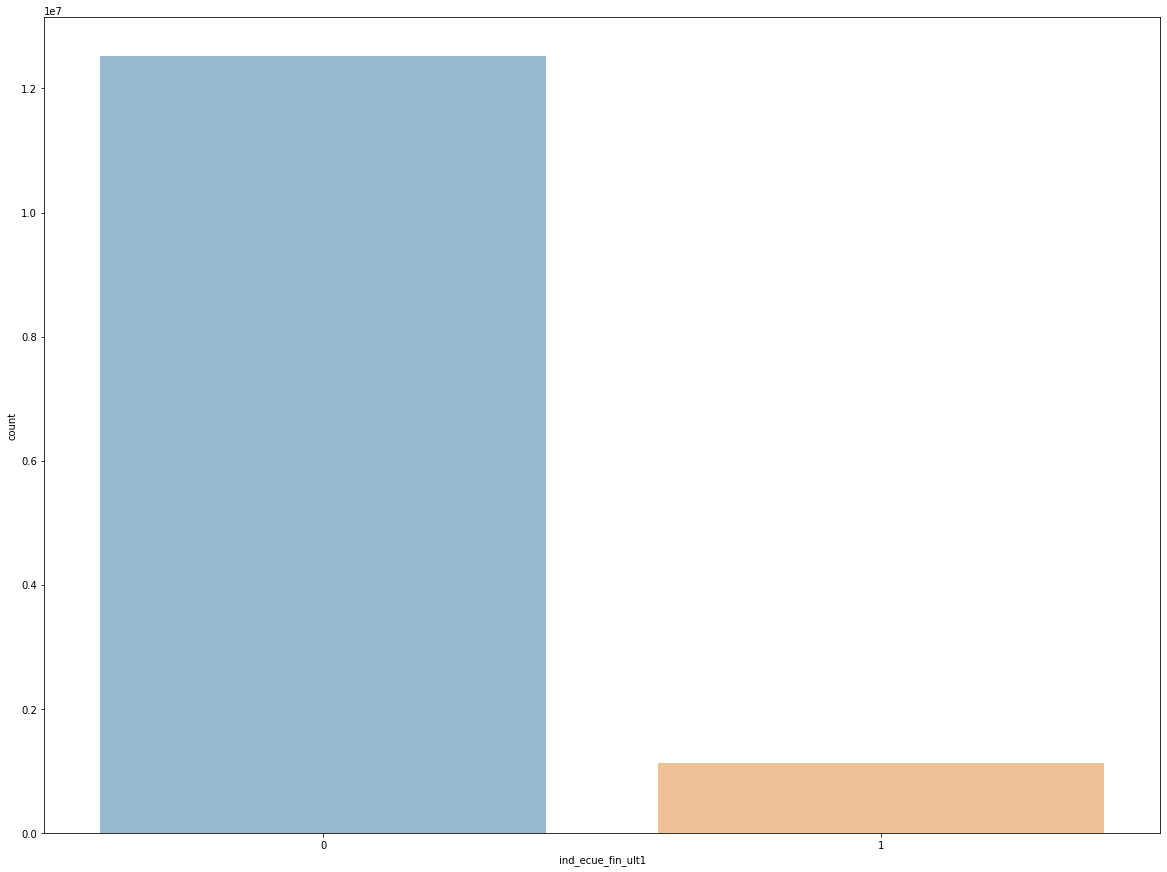

--------------------------------------------------
col :  ind_fond_fin_ult1


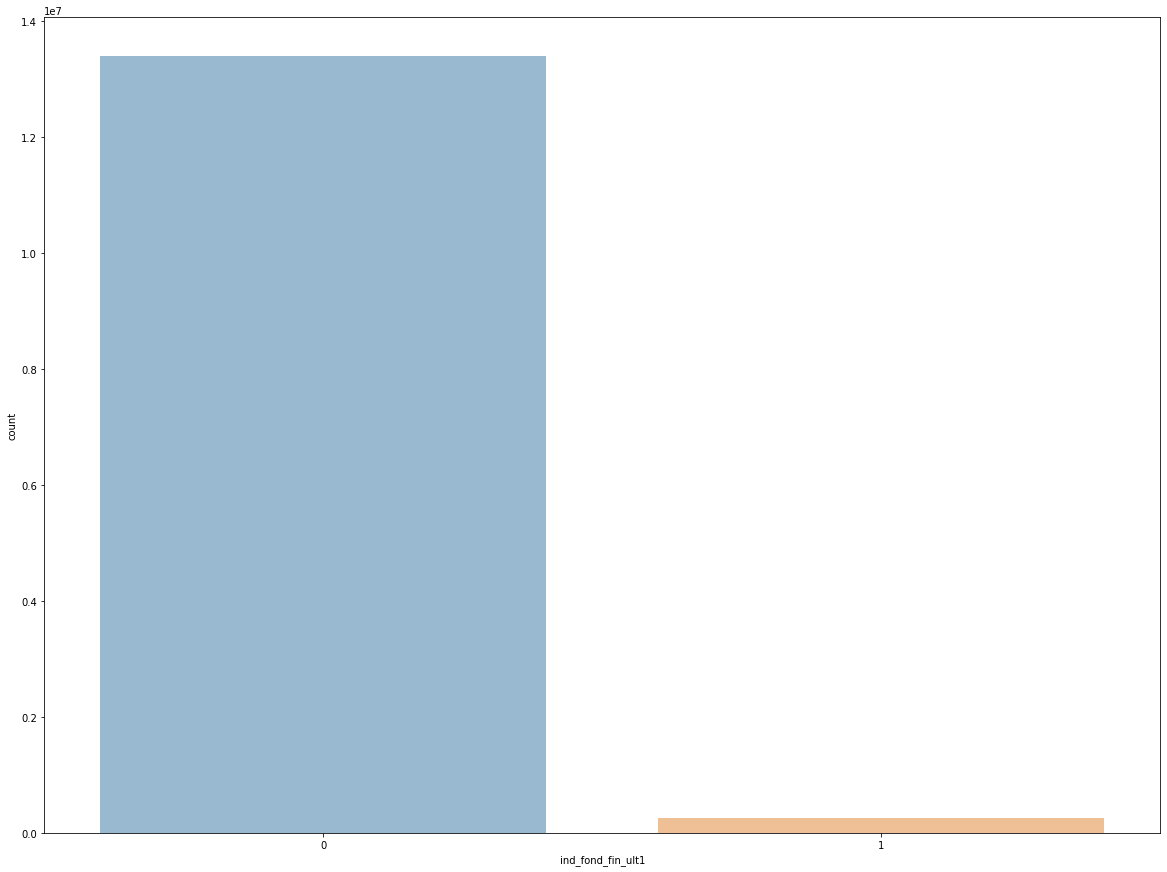

--------------------------------------------------
col :  ind_hip_fin_ult1


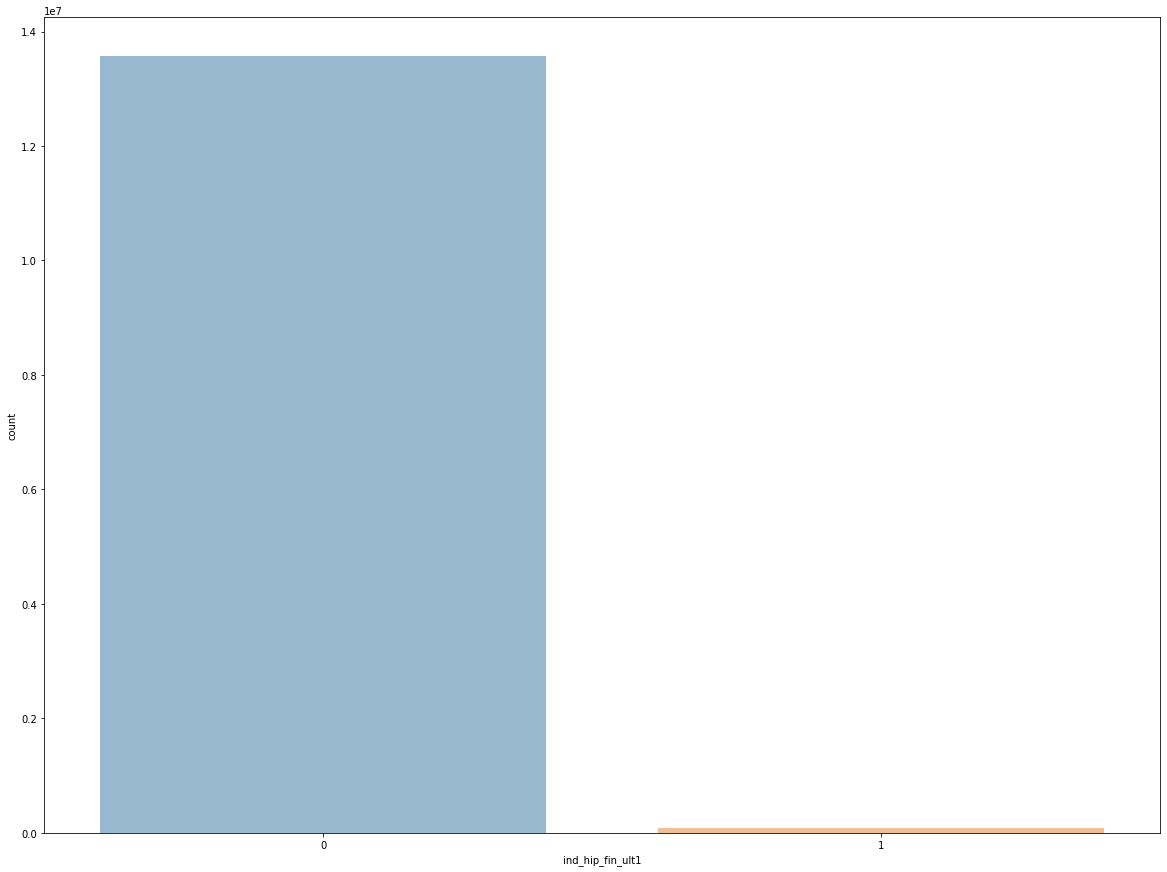

--------------------------------------------------
col :  ind_plan_fin_ult1


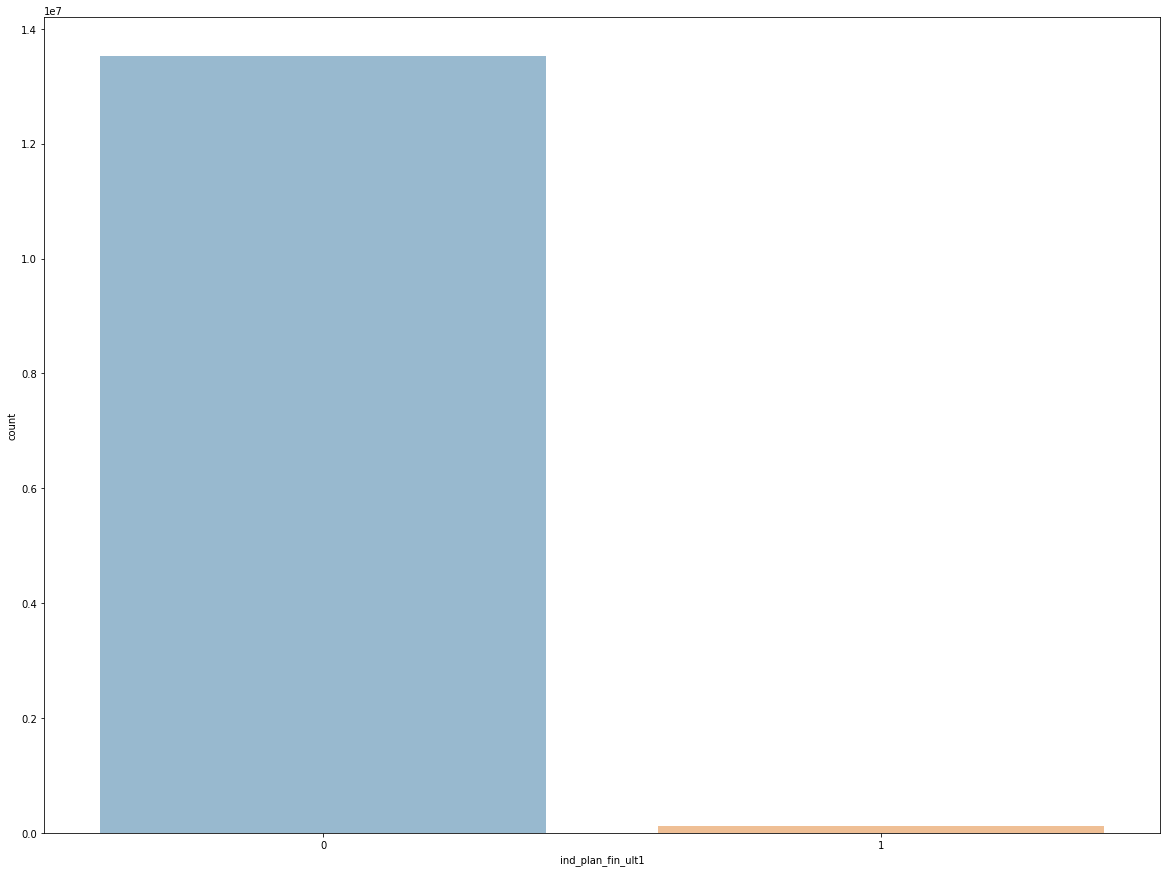

--------------------------------------------------
col :  ind_pres_fin_ult1


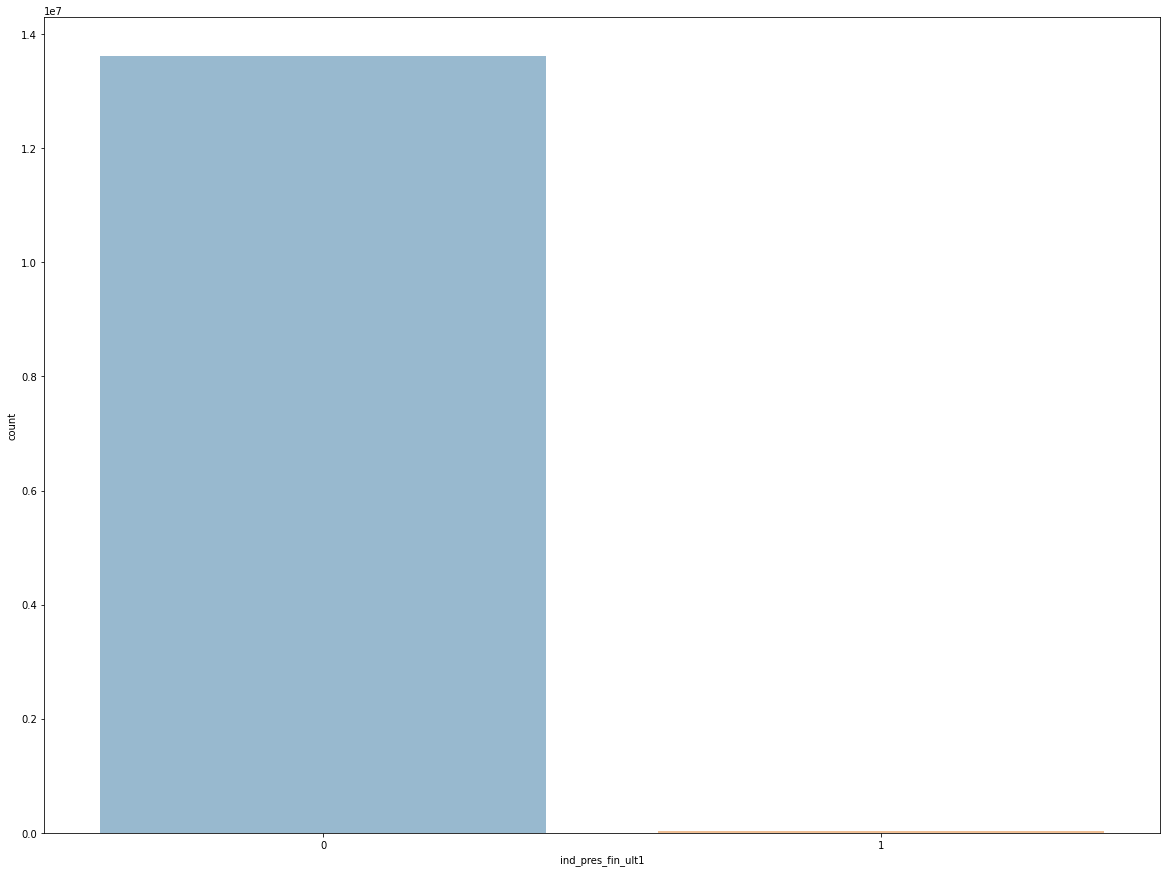

--------------------------------------------------
col :  ind_reca_fin_ult1


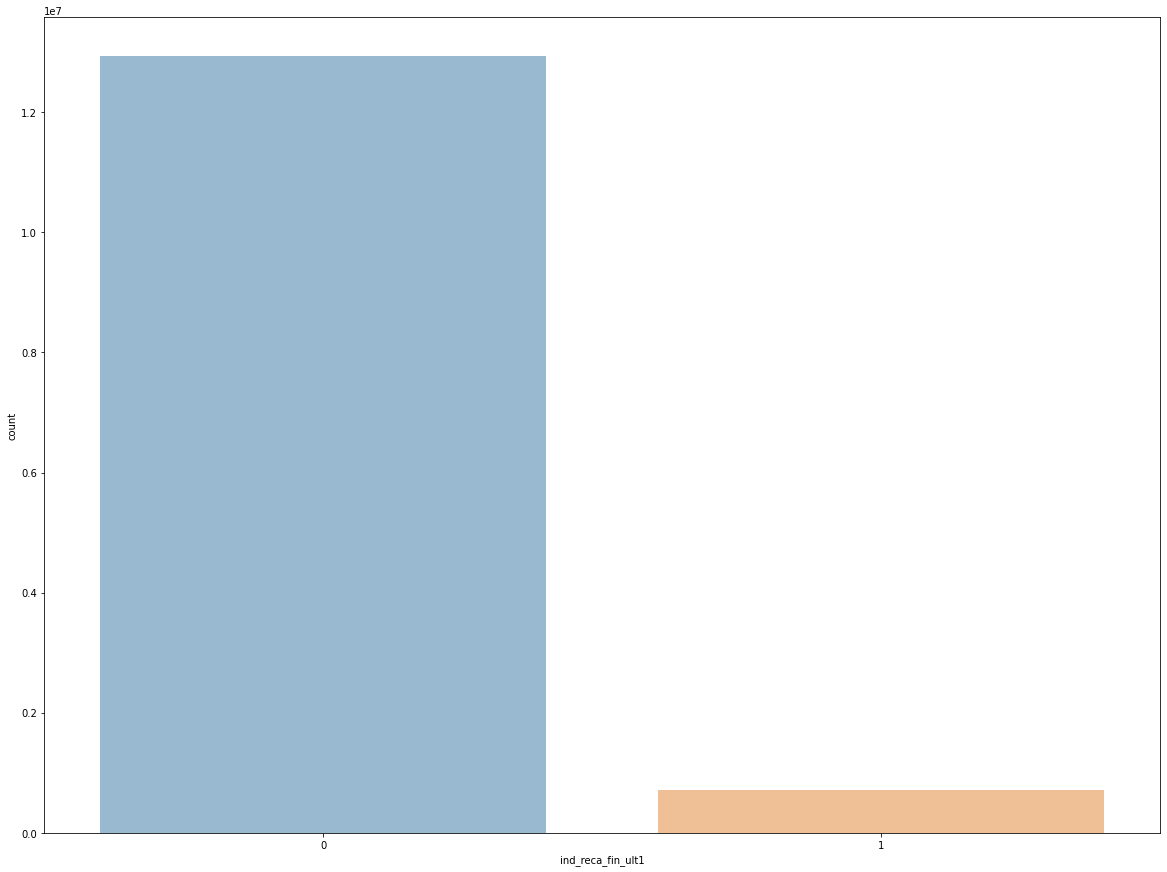

--------------------------------------------------
col :  ind_tjcr_fin_ult1


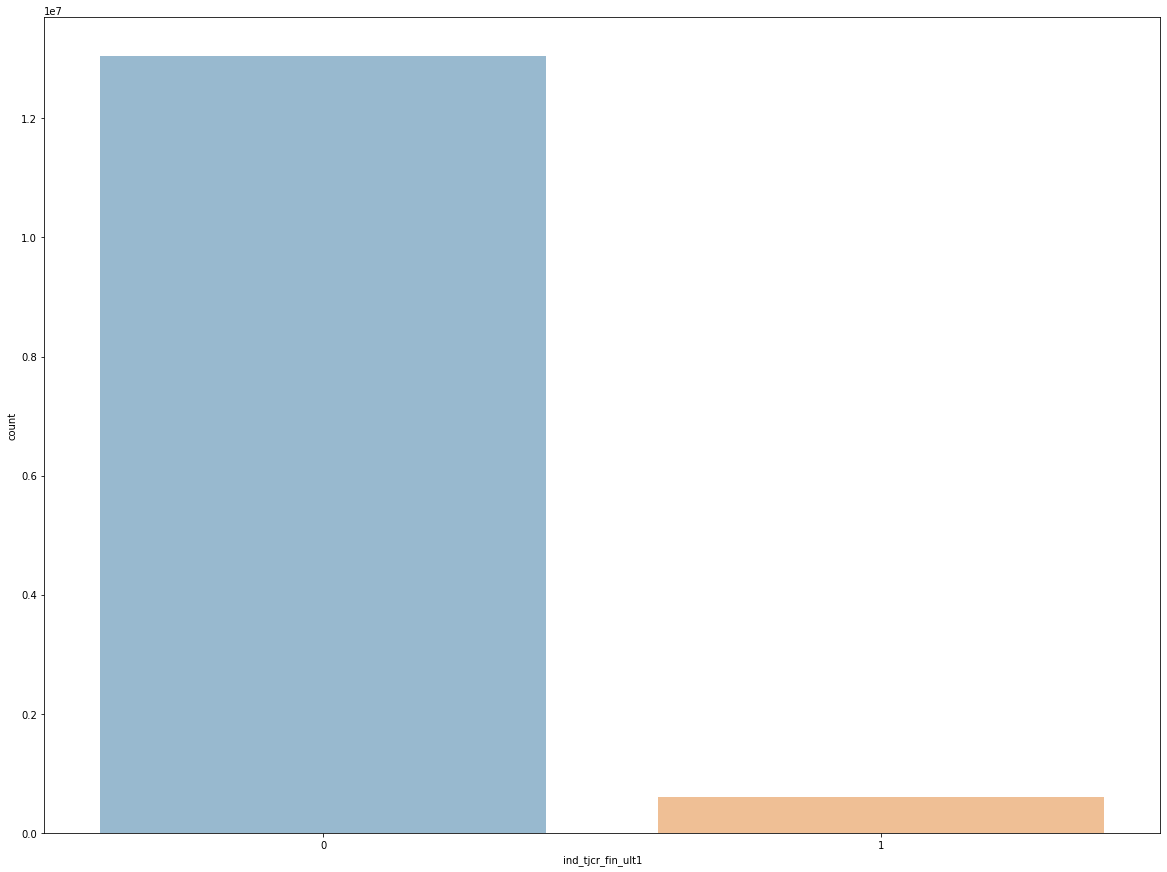

--------------------------------------------------
col :  ind_valo_fin_ult1


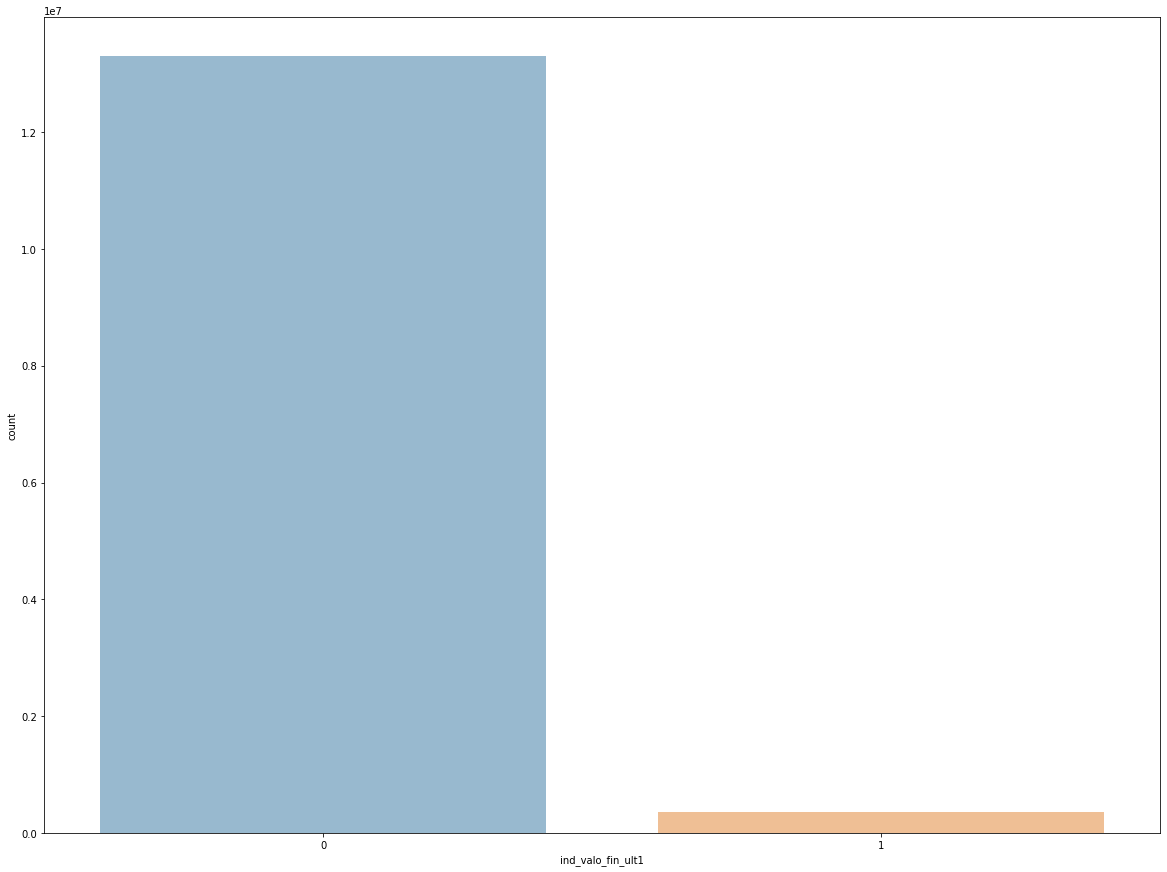

--------------------------------------------------
col :  ind_viv_fin_ult1


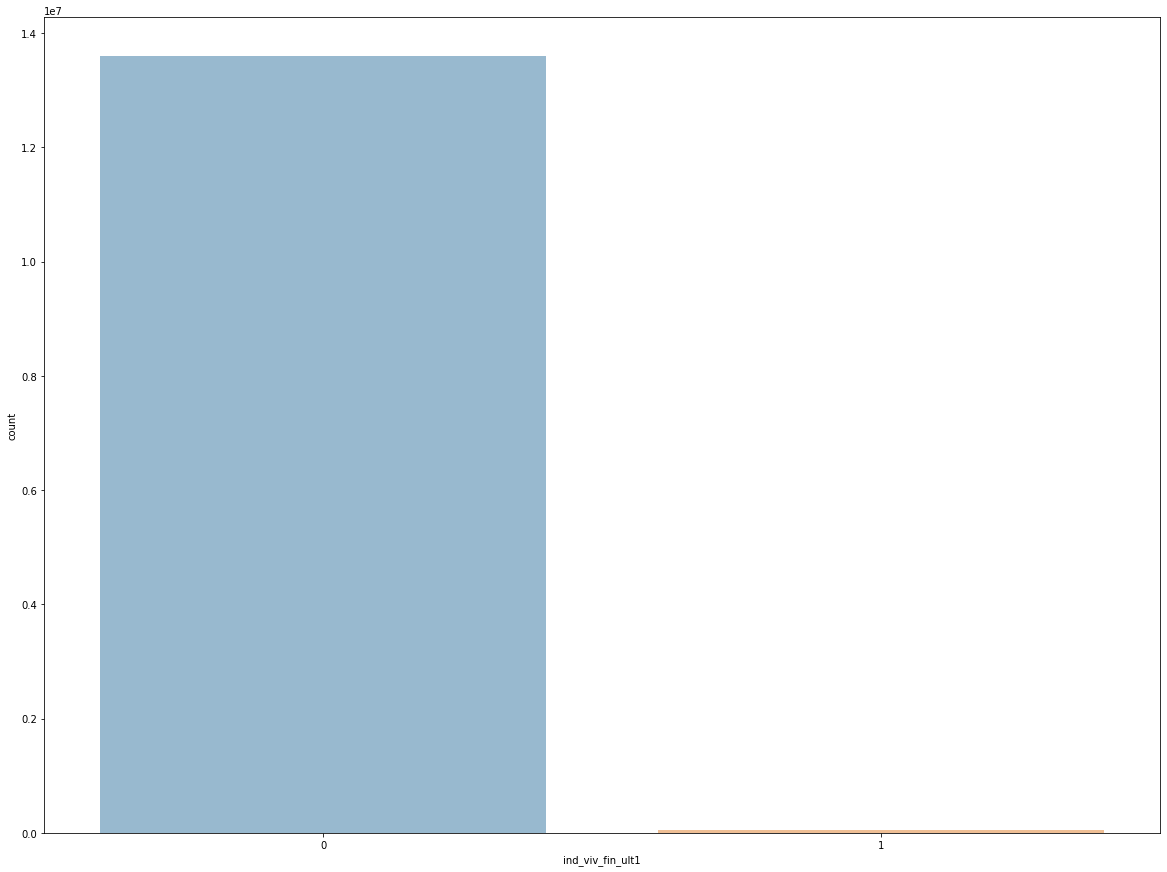

--------------------------------------------------
col :  ind_nomina_ult1


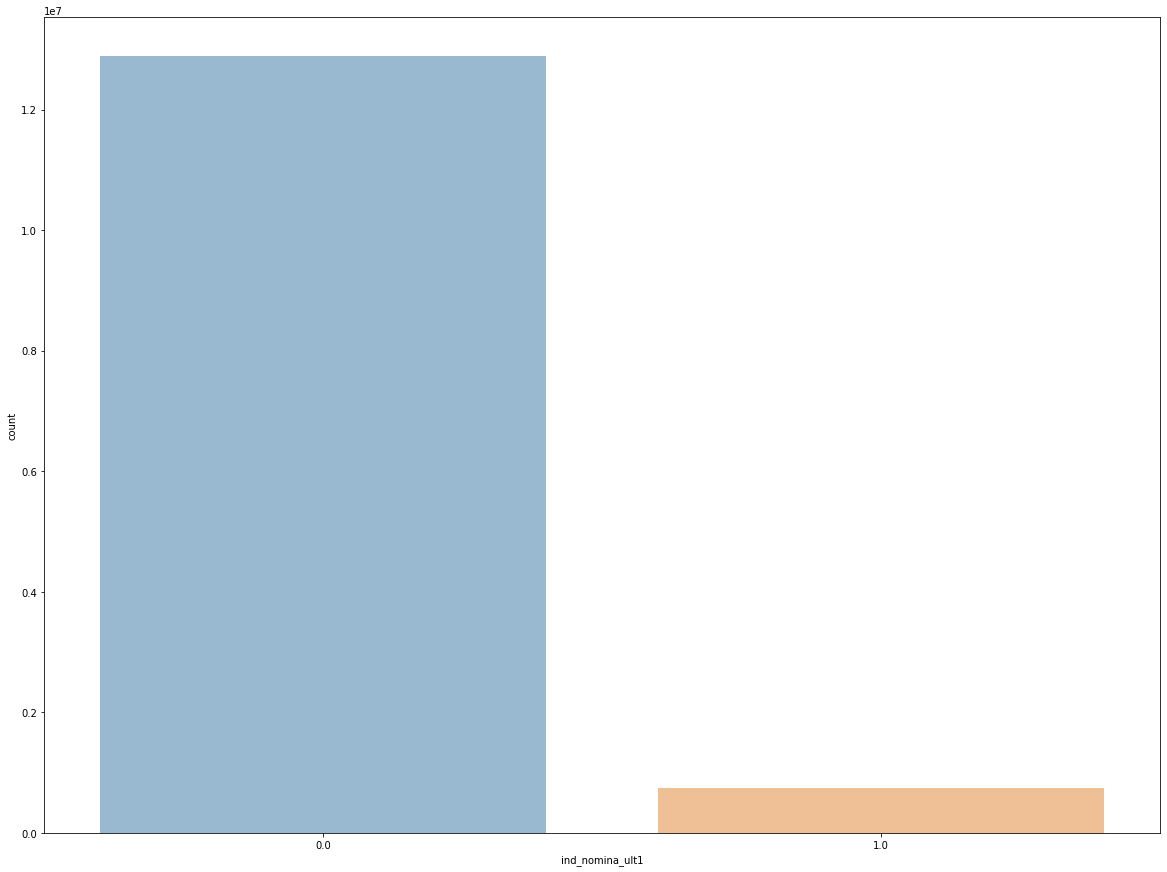

--------------------------------------------------
col :  ind_nom_pens_ult1


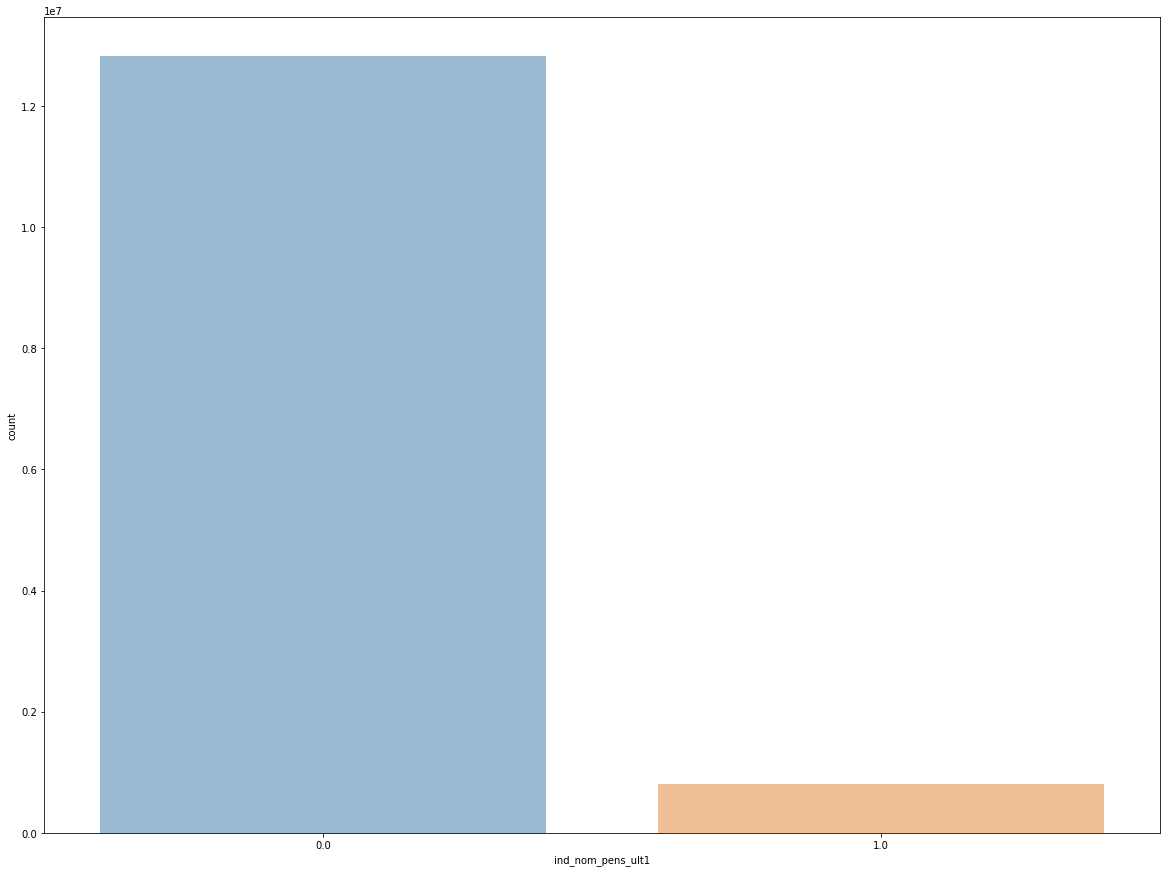

--------------------------------------------------
col :  ind_recibo_ult1


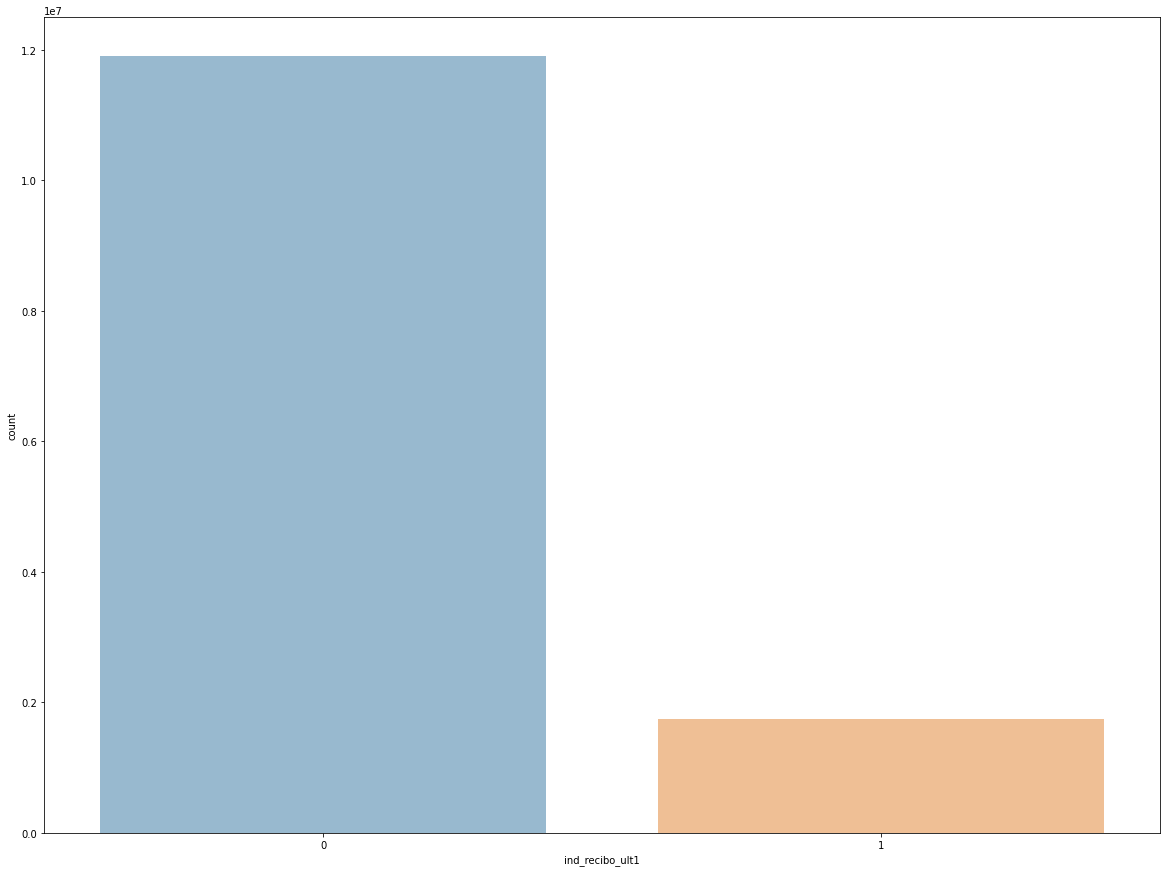

In [12]:
skip_cols = ['ncodpers', 'renta'] # 너무 많은 변수가 있으면 시각화에 시간이 많이 소요되므로 스킵
for col in trn.columns:
    # 출력에 시간이 많이 걸리는 두 변수는 skip
    if col in skip_cols:
        continue
    
    # 가시성을 위한 영역 구분과 변수명 출력
    print ('-' * 50)
    print ('col : ', col)
    
    # 그래프 크기(figsize)를 설정
    f, ax = plt.subplots(figsize=(20,15))
    
    # searborn을 사용한 막대 그래프 생성 (alpha는 투명도를 의미하며 0으로 갈 수록 투명함)
    sns.countplot(x=col, data=trn, alpha=0.5)
    
    # show() 함수를 통해 시각화
    plt.show()

### 월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화하기

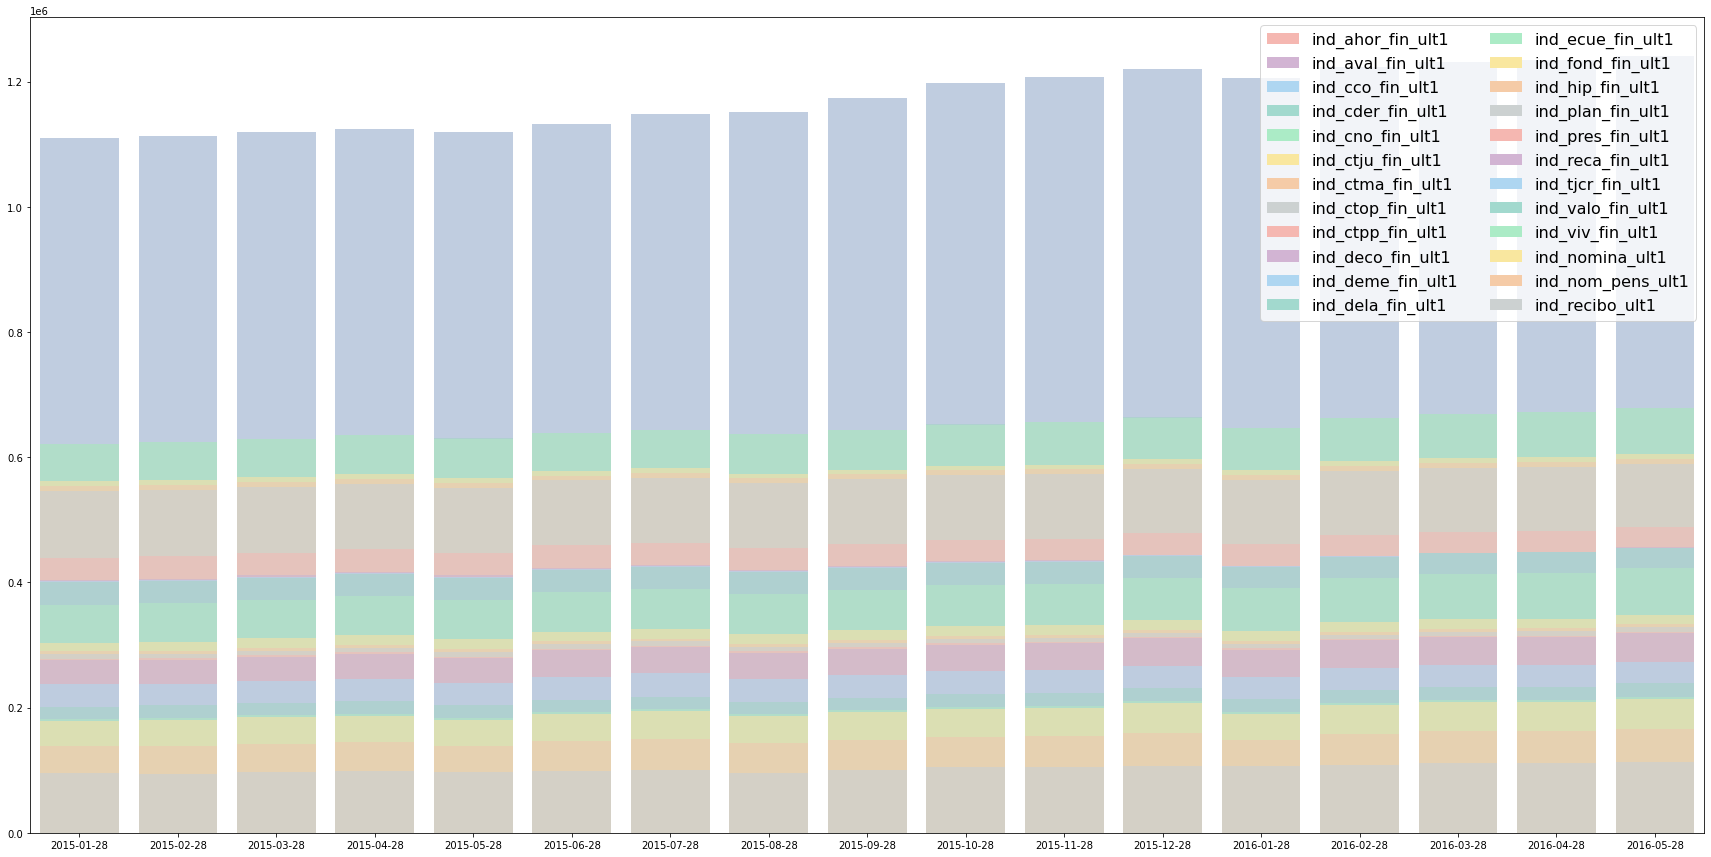

In [13]:
# 날짜 데이터를 기준으로 분석하기 위해서, 날짜 데이터 별도로 추출함
months = trn['fecha_dato'].unique().tolist()

# 제품 변수 24개를 추출
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    # 매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여, label_sum에 저장
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())


#근데 여기 밑에 주석까지 4줄이 이해가 안됨
label_sum_over_time = []
for i in range(len(label_cols)):
    # 누적 막대 그래프 시각화를 위해, n 번째 제품의 총합을 1 ~ n번째 제품의 총합으로 만듦
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1', '#D2B4D3','#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    # 24개 제품에 대해 Histogram을 그림
    # x 축에는 월 데이터, y 축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha 값은 0.7로 지정
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
# 우측 상단에 Legend를 추가
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

### 절대값이 아닌 월별 상대값으로 시각화해 시각적으로 보기 쉽게 표현

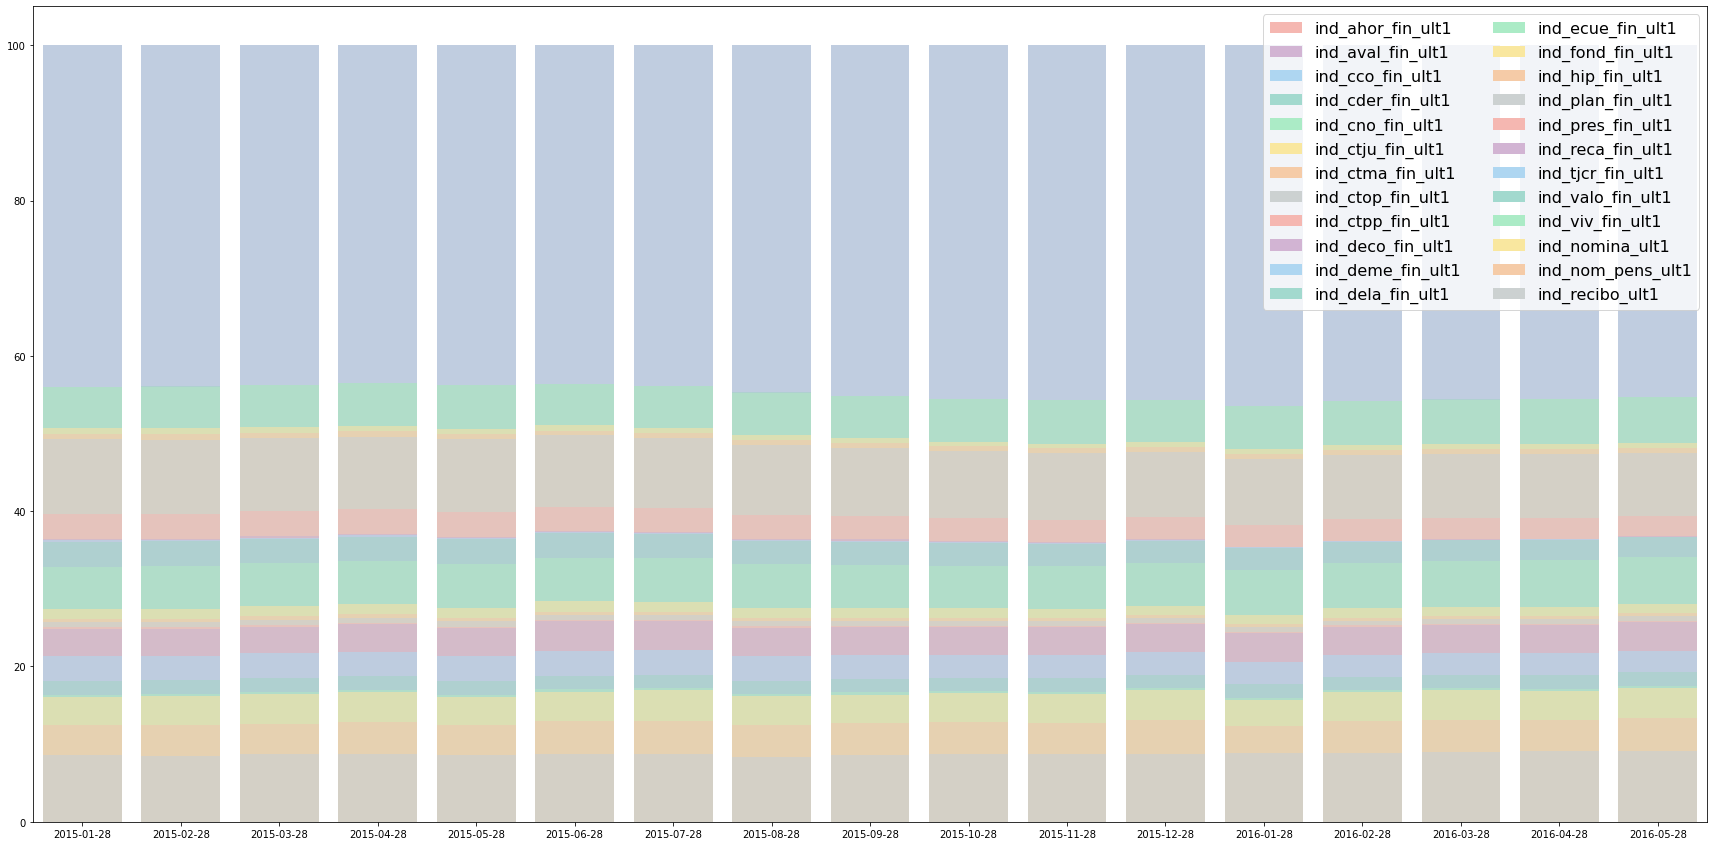

In [14]:
#label_sum_over_time의 값을 퍼센트 단위로 변환. 월마다 최댓값으로 나누고 100을 곱해줌
label_sum_percent = (label_sum_over_time) / (1.*np.asarray(label_sum_over_time).max(axis=0)) * 100

# 앞선 코드와 동일한, 시각화 실행 코드
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

### 24개 금융 제품에 대한 신규 구매 데이터 생성

In [1]:
import pandas as pd
import numpy as np
# Chcunk를 분할하여 담을 리스트 생성
chunk_box = list()

# chcunk를 읽어와서 chunk_box에 추가
for chunk in pd.read_csv('C:/Users/roytravel/.kaggle/santander-product-recommendation/train_ver2.csv', low_memory=False, chunksize=20000):
    chunk_box.append(chunk)

### chcunk_box에 존재하는 데이터 프레임 결합
trn = pd.concat(chunk_box, axis = 0)

# trn = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/santander-product-recommendation/train_ver2.csv')


# 제품 변수를 prods에 list 형태로 저장
prods = trn.columns[24:].tolist()

#날짜를 숫자로 변환하는 함수. 2015-01-28은 1, 2016-06-28은 18로 변환
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환해 int_date에 저장
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더해 lag를 생성. 변수명에 _prev를 추가
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# 원본 데이터와 lag 데이터를 ncodeper와 int_date 기준으로 합침. lag 데이터의 int_date는 1 밀려 있기 때문에, 저번 달의 제품 정보가 삽입됨
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거
del trn, trn_lag

# 저번 달의 제품 정보가 존재하지 않을 경우 대비해 0으로 대체.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
    
# 원본 데이터에서의 제품 보유 여부 - lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구함
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)
    
# 신규 구매 변수만을 추출해 labels에 저장.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
# labels.to_csv('/content/gdrive/My Drive/Colab Notebooks/santander-product-recommendation/labels.csv', index=False)
labels.to_csv('/kaggle/santander-product-recommendation/label.csv', index=False)

### 월별 신규 구매 데이터를 누적 막대 그래프로 시각화하기

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

labels = pd.read_csv('/kaggle/santander-product-recommendation/label.csv').astype(int)
fecha_dato = pd.read_csv('/kaggle/santander-product-recommendation/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplolt(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

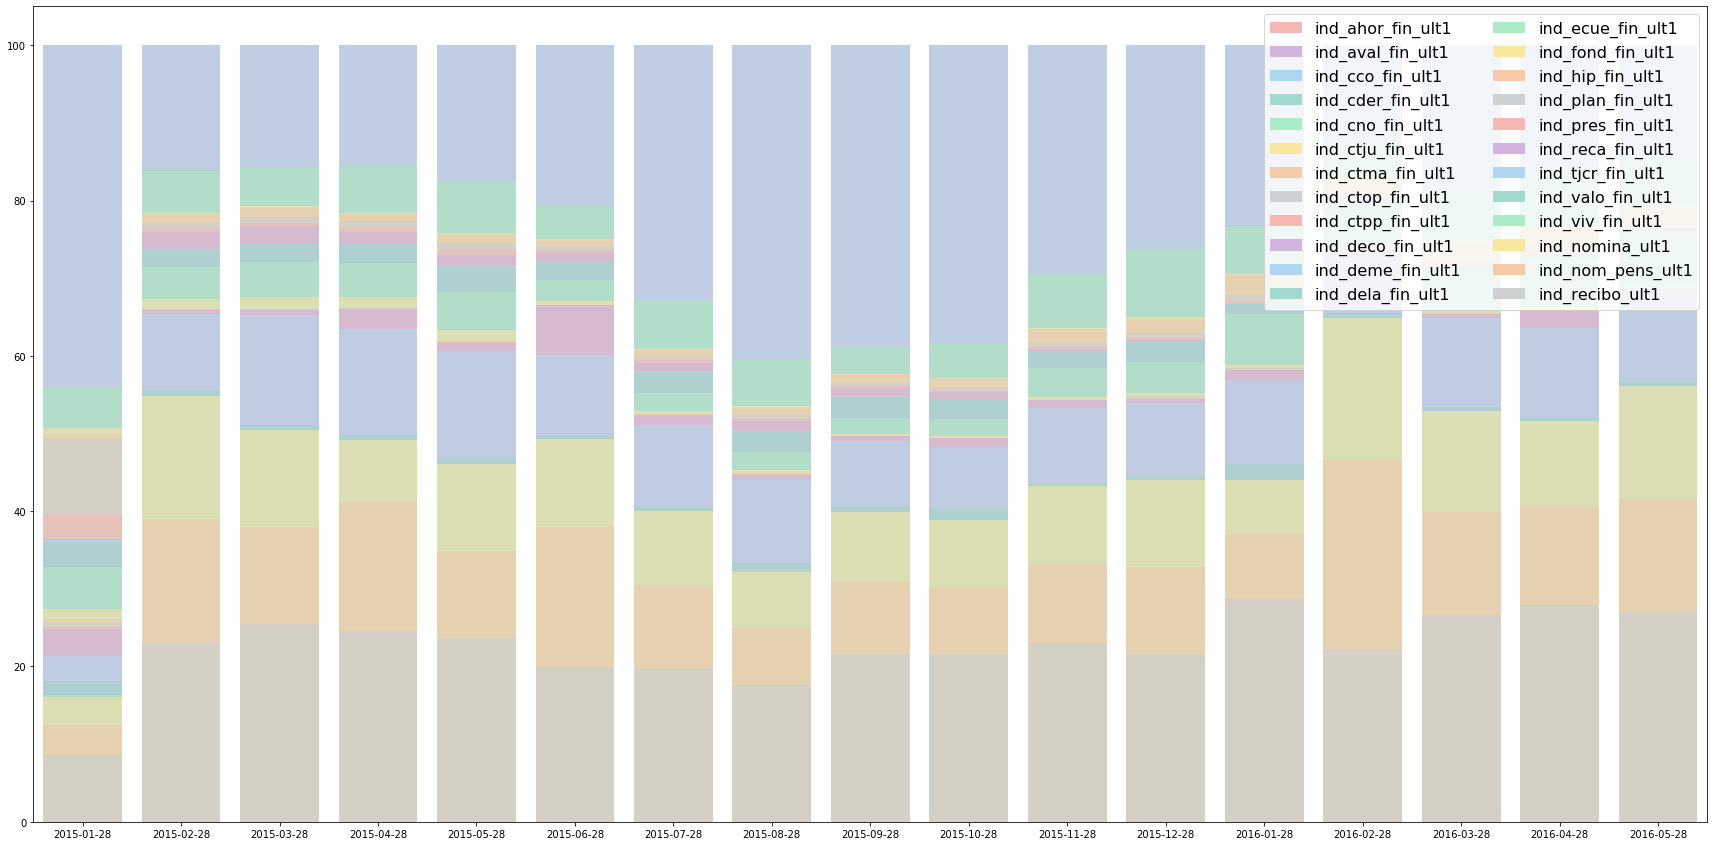

In [6]:

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)) * 100)

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})